# Final Project

**Kelompok GGS:**
1. Marteen Joshe Octavian
2. Muhammad Luthfi
3. Rama Satriya
4. Salman Tulus Pribadi

## Import Package

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

##### Membuat variabel baru untuk data yang akan diproses

In [3]:
df_pre = df.copy()

##### Men-drop 2 kolom terakhir sesuai dengan yang disarankan data creator dan 'CLIENTNUM' karena dianggap tidak berkorelasi

In [4]:
df_pre = df_pre.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

### Descriptive Statistics

In [5]:
df_pre.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Insight: Masih banyak feature yang terlihat belum terdistribusi normal secara statistik

##### Mencari data null

In [6]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
df_pre.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Dari tampilan di atas, tidak ada data yang null

##### Membagi data sesuai tipe

In [8]:
cat = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
num = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

### Statistical Summary

In [9]:
df_pre[num].describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [10]:
df_pre[cat].describe()

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

##### Menghitung jumlah nilai unik pada categorical feature

In [11]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df_pre[col].value_counts())
    print()

Value count kolom Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Value count kolom Gender:
F    5358
M    4769
Name: Gender, dtype: int64

Value count kolom Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Value count kolom Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Value count kolom Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Value count kolom Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64



Ada beberapa data yang bernilai 'Unknown' pada beberapa kolom

##### Menghitung presentase data yang bernilai 'Unknown'

In [12]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(round((df_pre[col].value_counts()/df_pre[col].count()*100), 2))
    print()

Value count kolom Attrition_Flag:
Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

Value count kolom Gender:
F    52.91
M    47.09
Name: Gender, dtype: float64

Value count kolom Education_Level:
Graduate         30.89
High School      19.88
Unknown          15.00
Uneducated       14.68
College          10.00
Post-Graduate     5.10
Doctorate         4.45
Name: Education_Level, dtype: float64

Value count kolom Marital_Status:
Married     46.28
Single      38.94
Unknown      7.40
Divorced     7.39
Name: Marital_Status, dtype: float64

Value count kolom Income_Category:
Less than $40K    35.16
$40K - $60K       17.68
$80K - $120K      15.16
$60K - $80K       13.84
Unknown           10.98
$120K +            7.18
Name: Income_Category, dtype: float64

Value count kolom Card_Category:
Blue        93.18
Silver       5.48
Gold         1.15
Platinum     0.20
Name: Card_Category, dtype: float64



## Case 1: Membiarkan Nilai Unknown

In [13]:
df1_pre = df_pre.copy()

##### Mencari Tahu Apakah Ada Data yang Duplikat

In [14]:
df1_pre.duplicated().sum()

0

Tidak ada data yang duplikat

### Univariate Analysis

#### Boxplot

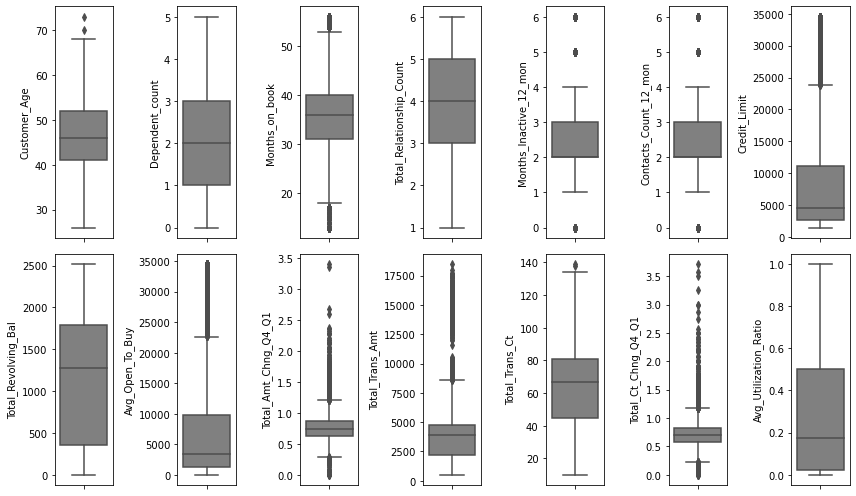

In [15]:
ua1 = plt.figure(figsize=(12, 7))
for i in range(0, len(num)):
    plt.subplot(2, len(num)/2, i+1)
    sns.boxplot(y=df1_pre[num[i]], color='gray', orient='v')
    plt.tight_layout()
ua1.savefig('Figure/Boxplot df1_pre.png')

Masih terdapat banyak outlier pada data ini

#### Distplot

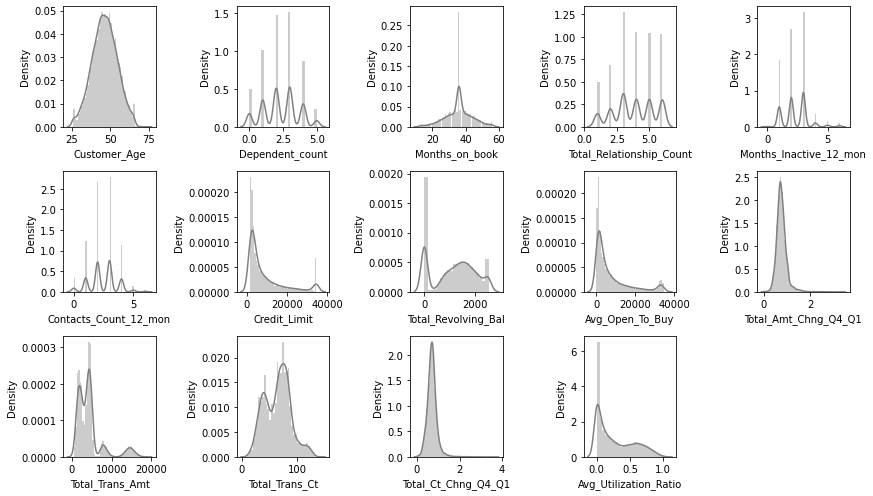

In [16]:
ua2 = plt.figure(figsize=(12, 7))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df1_pre[num[i]], color='gray')
    plt.tight_layout()
ua2.savefig('Figure/Displot1 df1_pre.png')

Banyak feature yang belum terdistribusi normal

#### Countplot

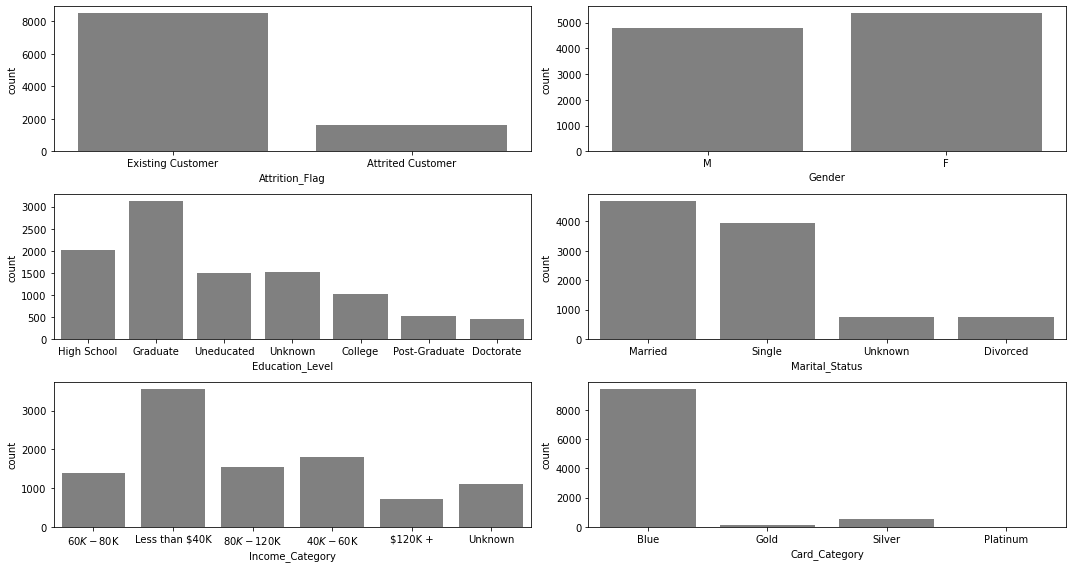

In [17]:
ua2 = plt.figure(figsize=(15, 8))
for i in range(0, len(cat)):
    plt.subplot(3, 2, i+1)
    sns.countplot(df1_pre[cat[i]], color='gray')
    plt.tight_layout()
ua2.savefig('Figure/Countplot df1_pre.png')

### Multivariate Analysis

#### Heatmap

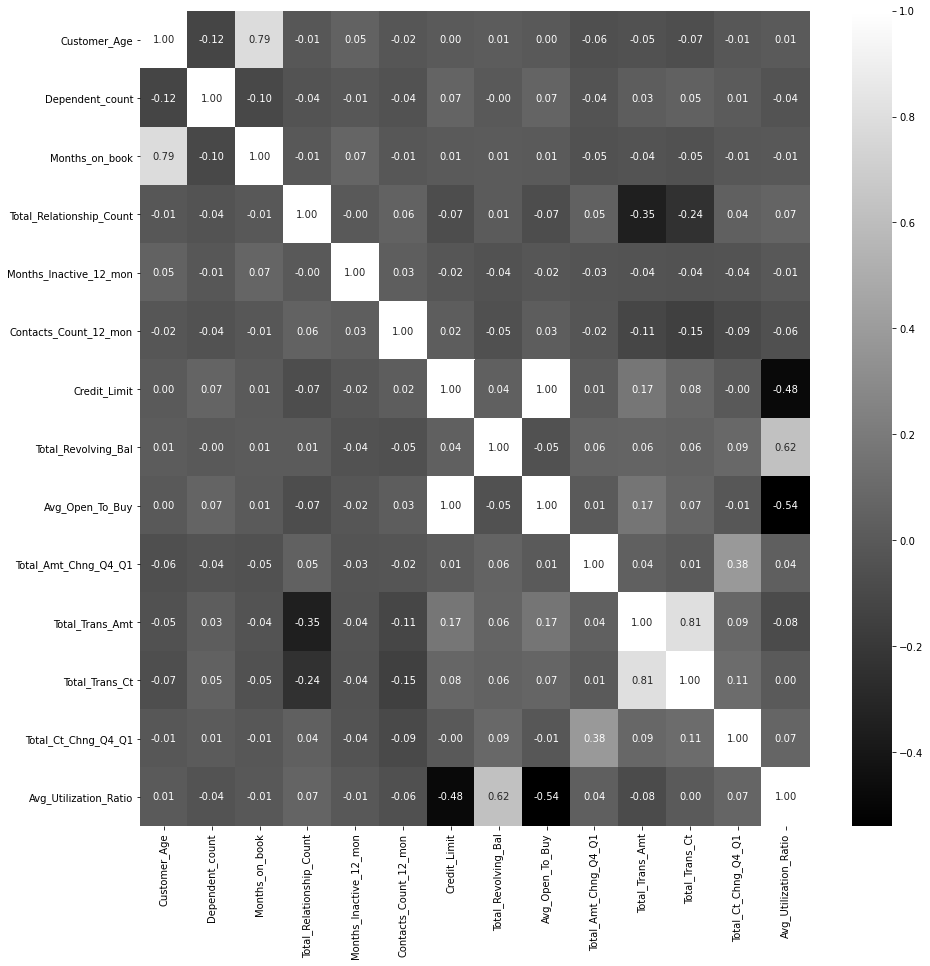

In [18]:
ma1 = plt.figure(figsize=(15, 15))
sns.heatmap(df1_pre.corr(), cmap='gray', annot=True, fmt='.2f')
ma1.savefig('Figure/Heatmap df1_pre.png')

#### Pairplot

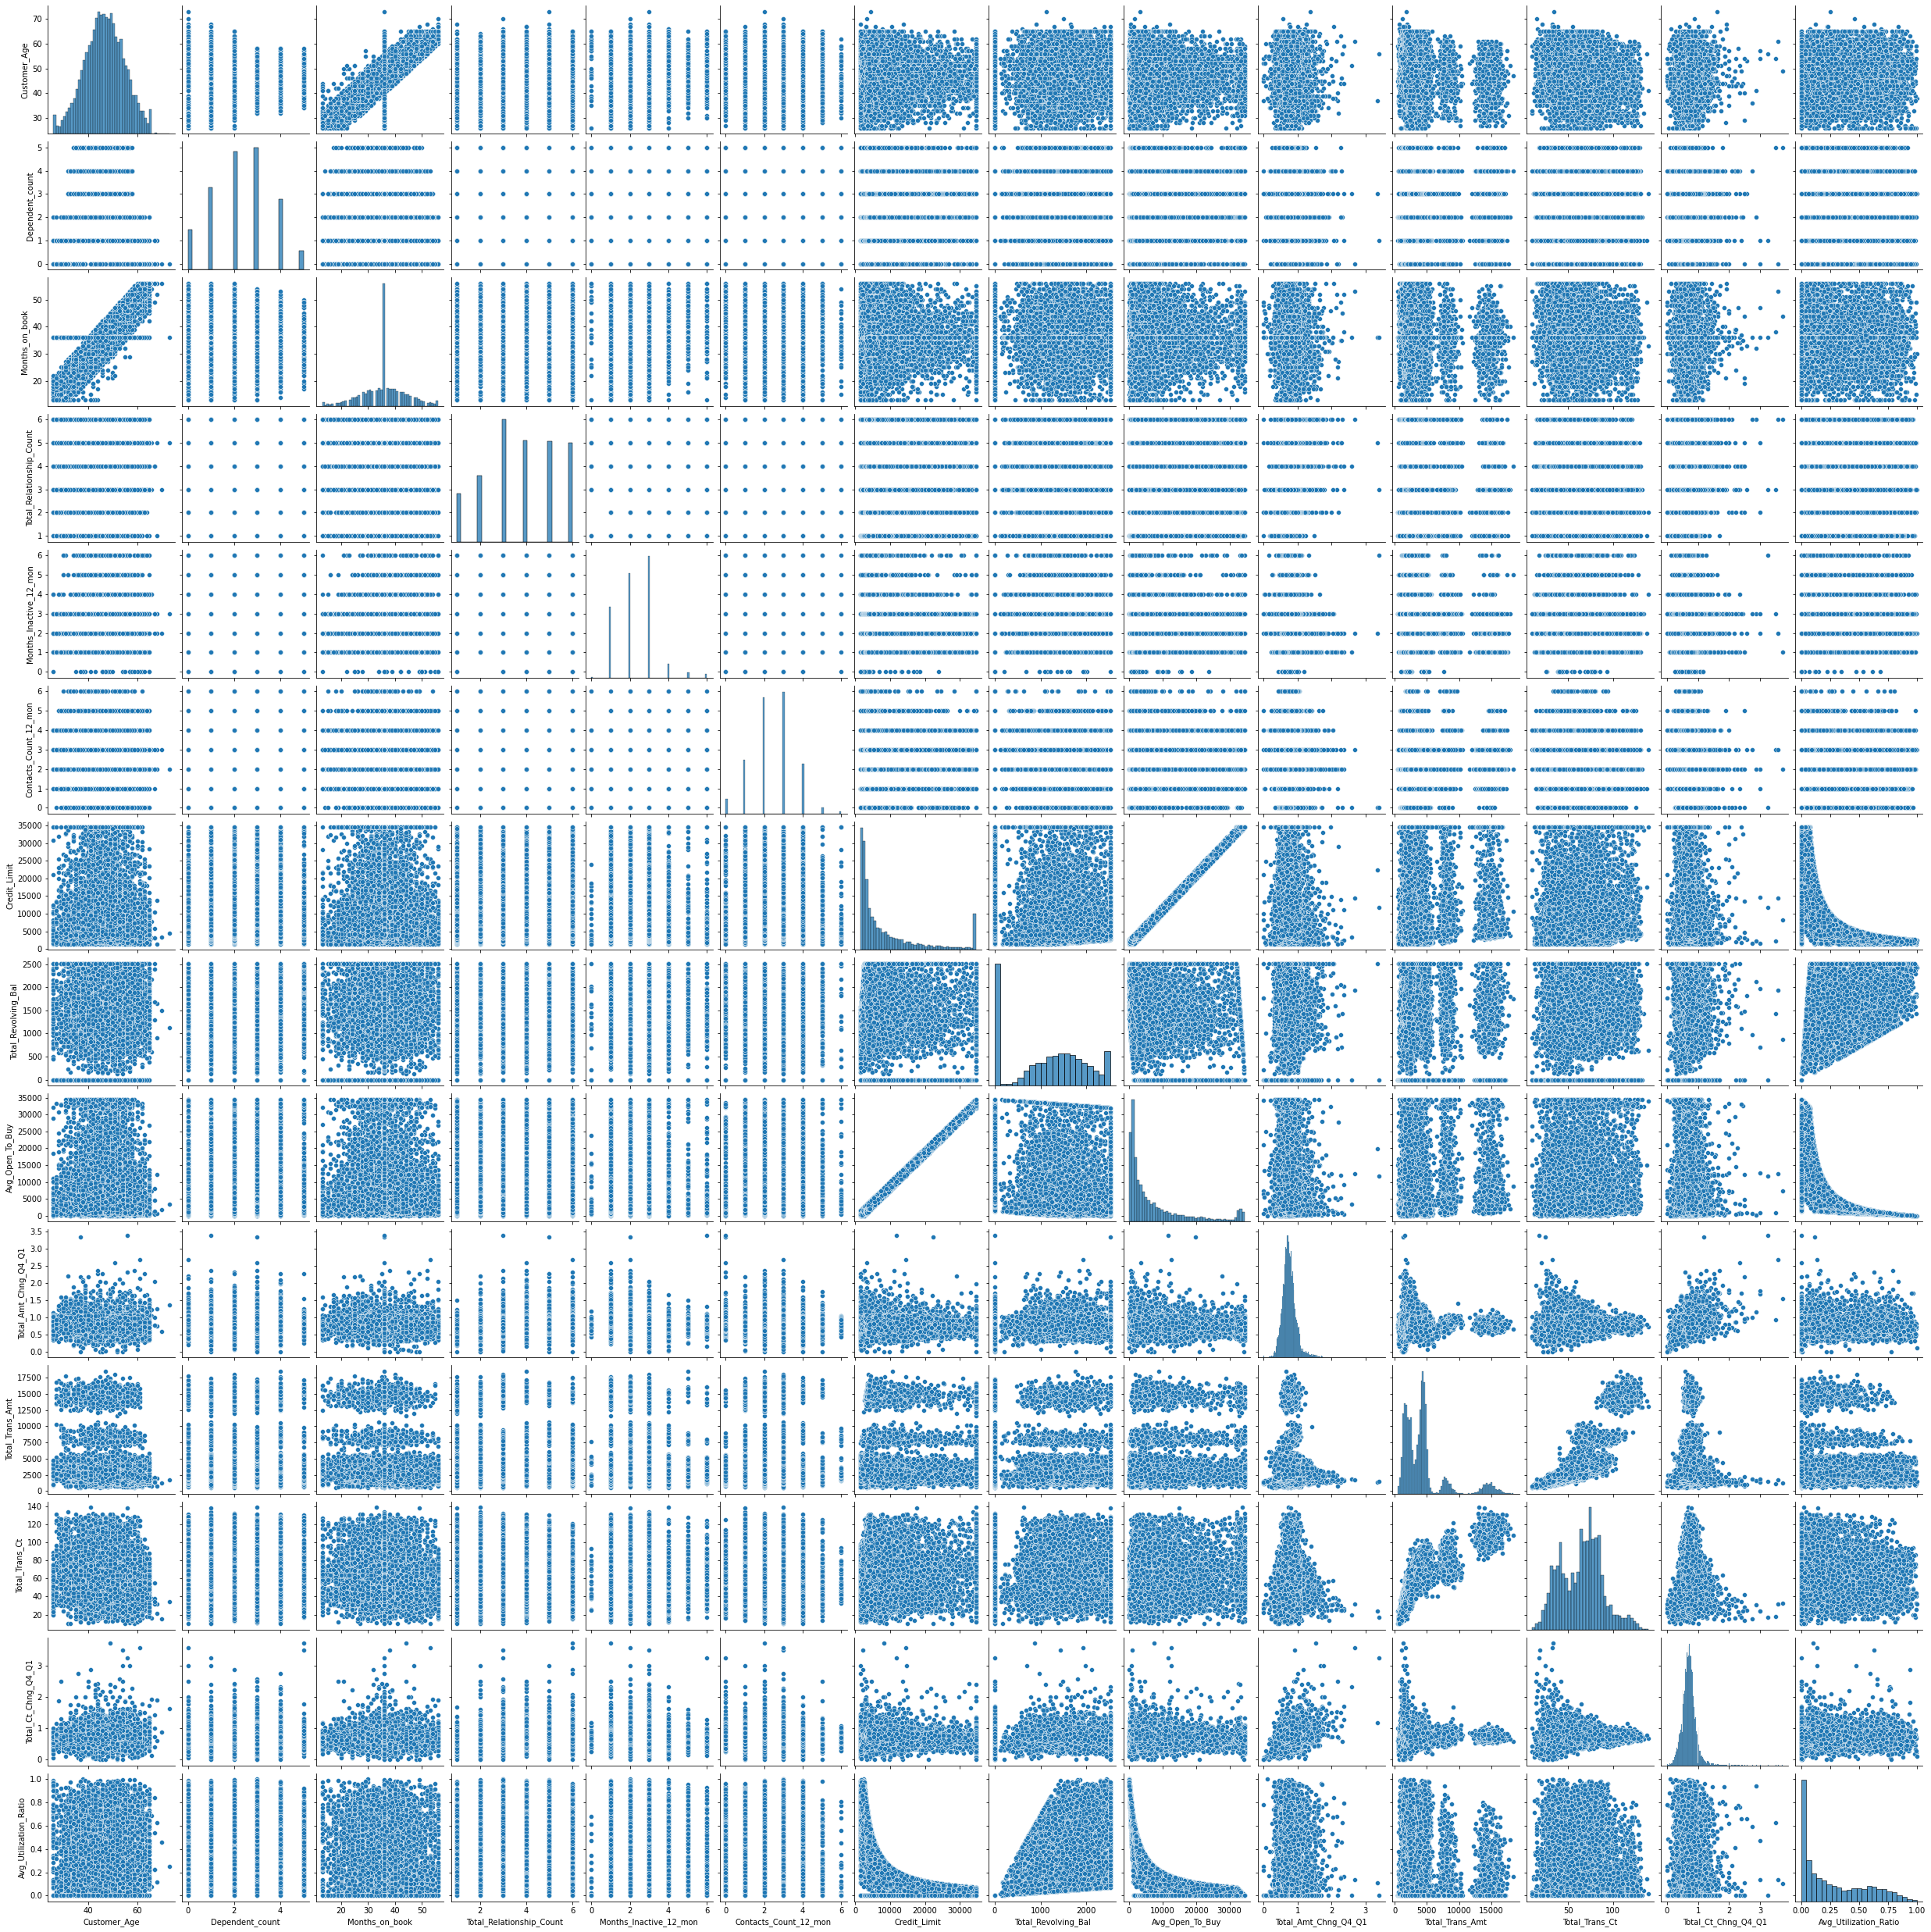

In [19]:
ma2 = sns.pairplot(df1_pre)
sns.color_palette("rocket", as_cmap=True)
ma2.savefig('Figure/Pairplot df1_pre.png')

#### 'Card_Category', 'Total_Trans_Amt'

In [20]:
dfm1 = df1_pre.groupby(['Card_Category']).agg({'Total_Trans_Amt':['sum']}).reset_index()
dfm1.columns = ['Card_Category','Total_Amt']
dfm1.sort_values('Total_Amt', ascending=False)

Card_Category  Total_Amt
0          Blue   39870938
3        Silver    3657718
1          Gold     891531
2      Platinum     179995

#### 'Card_Category', 'Attrition_Flag', 'Attrition_Flag'

In [21]:
dfm2 = df1_pre.groupby(['Card_Category','Attrition_Flag']).agg({'Attrition_Flag':['count']}).reset_index()
dfm2.columns = ['Card_Category','Churn','Customer_Numbers']
dfm2['Total_Numbers'] = dfm2.groupby(['Card_Category'])['Customer_Numbers'].transform('sum')
dfm2['Percentage'] = dfm2['Customer_Numbers']/dfm2['Total_Numbers']*100
dfm2.sort_values('Customer_Numbers', ascending=False)
dfm2

Card_Category              Churn  Customer_Numbers  Total_Numbers  \
0          Blue  Attrited Customer              1519           9436   
1          Blue  Existing Customer              7917           9436   
2          Gold  Attrited Customer                21            116   
3          Gold  Existing Customer                95            116   
4      Platinum  Attrited Customer                 5             20   
5      Platinum  Existing Customer                15             20   
6        Silver  Attrited Customer                82            555   
7        Silver  Existing Customer               473            555   

   Percentage  
0   16.097923  
1   83.902077  
2   18.103448  
3   81.896552  
4   25.000000  
5   75.000000  
6   14.774775  
7   85.225225

#### 'Card_Category', 'Attrition_Flag'

In [22]:
dfm3 = df1_pre.groupby(['Card_Category']).agg({'Attrition_Flag':['count']}).reset_index()
dfm3.columns = ['Card_Category','Customer_Numbers']
dfm3['Total_Numbers'] = 9436+116+20+555
dfm3['Percentage'] = dfm3['Customer_Numbers']/dfm3['Total_Numbers']
dfm3.sort_values('Customer_Numbers', ascending=False)

Card_Category  Customer_Numbers  Total_Numbers  Percentage
0          Blue              9436          10127    0.931767
3        Silver               555          10127    0.054804
1          Gold               116          10127    0.011455
2      Platinum                20          10127    0.001975

<Figure size 432x288 with 0 Axes>

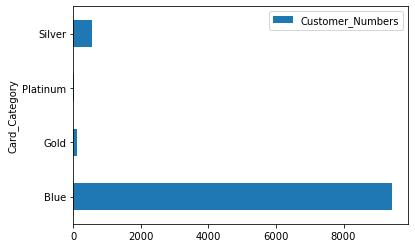

In [23]:
ma3 = plt.figure()
dfm3.plot(x='Card_Category', y='Customer_Numbers', kind='barh');
ma3.savefig('Figure/ma3.png')

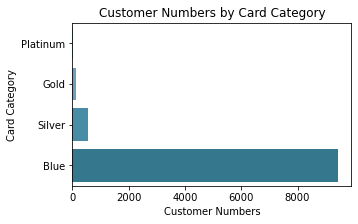

In [24]:
ma4 = plt.figure(figsize=(5,3))
sns.set_palette("PuBuGn_d")
sns.barplot(x='Customer_Numbers',
            y='Card_Category', 
            data=dfm3,
            order=dfm3.sort_values('Customer_Numbers').Card_Category)
# set labels
plt.xlabel('Customer Numbers', size=10)
plt.ylabel("Card Category", size=10)
plt.title("Customer Numbers by Card Category", size=12)

ma4.savefig('Figure/ma4.png')

#### 'Card_Category', 'Attrition_Flag', 'Total_Trans_Amt'

In [25]:
dfm4 = df1_pre.groupby(['Card_Category','Attrition_Flag']).agg({'Total_Trans_Amt':['sum']}).reset_index()
dfm4.columns = ['Card_Category','Churn','Total_Amt']
dfm4.sort_values('Total_Amt', ascending=False)

Card_Category              Churn  Total_Amt
1          Blue  Existing Customer   35383562
0          Blue  Attrited Customer    4487376
7        Silver  Existing Customer    3255944
3          Gold  Existing Customer     768853
6        Silver  Attrited Customer     401774
5      Platinum  Existing Customer     156216
2          Gold  Attrited Customer     122678
4      Platinum  Attrited Customer      23779

#### 'Attrition_Flag', 'Total_Trans_Amt'

In [26]:
dfm5 = df1_pre.groupby(['Attrition_Flag']).agg({'Total_Trans_Amt':['sum']}).reset_index()
dfm5.columns = ['Attrition_Flag','Total_Amt']
dfm5['LostperYear'] = dfm5['Total_Amt']/4.7
dfm5

Attrition_Flag  Total_Amt   LostperYear
0  Attrited Customer    5035607  1.071406e+06
1  Existing Customer   39564575  8.417995e+06

#### 'Card_Category', 'Attrition_Flag'

In [27]:
dfm6 = df1_pre.groupby(['Card_Category','Attrition_Flag']).agg({'Attrition_Flag':['count']}).reset_index()
dfm6.columns = ['Card_Category','Churn','Customer_Numbers']
dfm6 = dfm6[dfm6['Churn']=='Attrited Customer']
dfm6

Card_Category              Churn  Customer_Numbers
0          Blue  Attrited Customer              1519
2          Gold  Attrited Customer                21
4      Platinum  Attrited Customer                 5
6        Silver  Attrited Customer                82

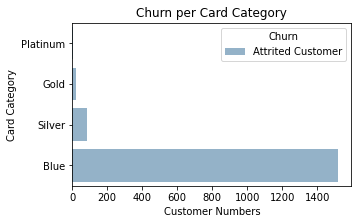

In [28]:
ma5 = plt.figure(figsize=(5,3))
sns.barplot(x='Customer_Numbers',
            y='Card_Category', 
            hue='Churn',
            data=dfm6,
            order=dfm6.sort_values('Customer_Numbers').Card_Category)
# set labels
plt.xlabel('Customer Numbers', size=10)
plt.ylabel('Card Category', size=10)
plt.title('Churn per Card Category', size=12)

ma5.savefig('Figure/ma5.png')

##  Feature Engineering

In [29]:
df1_encoded = df1_pre.copy()

### A. Label Encoding

##### 1. Membuat feature 'Churn' berdasarkan 'Attrition_Flag'

In [30]:
churn = []
for i, col in df1_encoded.iterrows():
    if df1_encoded['Attrition_Flag'][i]=='Attrited Customer':
        value = 1
    else:
        value = 0
    churn.append(value)

df1_encoded['Churn'] = churn

In [31]:
df1_encoded.head(1)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   

   Avg_Utilization_Ratio  Churn  
0                  0.061      0  

[1 rows x 21 columns]

##### 2. Membuat feature 'Income_Category_2' berdasarkan 'Income_Category'

In [32]:
ic = []
for i, col in df1_encoded.iterrows():
    if df1_encoded['Income_Category'][i]=='Unknown':
        ket1 = 0
    elif df1_encoded['Income_Category'][i]=='Less than $40K':
        ket1 = 1
    elif df1_encoded['Income_Category'][i]=='$40K - $60K':
        ket1 = 2
    elif df1_encoded['Income_Category'][i]=='$60K - $80K':
        ket1 = 3
    elif df1_encoded['Income_Category'][i]=='$80K - $120K':
        ket1 = 4
    else:
        ket1 = 5
    ic.append(ket1)

df1_encoded['Income_Category_2'] = ic

In [33]:
df1_encoded.head(1)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   

   Total_Relationship_Count  ...  Credit_Limit  Total_Revolving_Bal  \
0                         5  ...       12691.0                  777   

   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0          11914.0                 1.335             1144              42   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Churn  Income_Category_2  
0                1.625                  0.061      0                  3  

[1 rows x 22 columns]

##### 3. Membuat feature 'Education_Level_2' berdasarkan 'Education_Level'

In [34]:
df1_encoded['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [35]:
el = []
for i, col in df1_encoded.iterrows():
    if df1_encoded['Education_Level'][i]=='Unknown':
        ket2 = 0
    elif df1_encoded['Education_Level'][i]=='Uneducated':
        ket2 = 1
    elif df1_encoded['Education_Level'][i]=='High School':
        ket2 = 2
    elif df1_encoded['Education_Level'][i]=='College':
        ket2 = 3
    elif df1_encoded['Education_Level'][i]=='Graduate':
        ket2 = 4
    elif df1_encoded['Education_Level'][i]=='Post-Graduate':
        ket2 = 5
    else:
        ket = 6
    el.append(ket2)

df1_encoded['Education_Level_2'] = el

In [36]:
df1_encoded.head(1)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   

   Total_Relationship_Count  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                         5  ...                  777          11914.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   

   Avg_Utilization_Ratio  Churn  Income_Category_2  Education_Level_2  
0                  0.061      0                  3                  2  

[1 rows x 23 columns]

##### 4. Membuat feature 'Card_Category_2'

In [37]:
df1_encoded['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [38]:
cc = []
for i, col in df1_encoded.iterrows():
    if df1_encoded['Card_Category'][i]=='Blue':
        ket3 = 0
    elif df1_encoded['Card_Category'][i]=='Silver':
        ket3 = 1
    elif df1_encoded['Card_Category'][i]=='Gold':
        ket3 = 2
    else:
        ket3 = 3
    cc.append(ket3)

df1_encoded['Card_Category_2'] = cc

In [39]:
df1_encoded.head(1)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   

   Total_Relationship_Count  ...  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                         5  ...          11914.0                 1.335   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   

   Avg_Utilization_Ratio  Churn  Income_Category_2  Education_Level_2  \
0                  0.061      0                  3                  2   

   Card_Category_2  
0                0  

[1 rows x 24 columns]

### B. One-Hot Encoding

##### 1. Berdasarkan 'Gender'

In [40]:
ohe_g = pd.get_dummies(df1_encoded['Gender'], prefix='gender')
ohe_g.head()

gender_F  gender_M
0         0         1
1         1         0
2         0         1
3         1         0
4         0         1

##### 2. Berdasarkan 'Marital_Status'

In [41]:
ohe_ms = pd.get_dummies(df1_encoded['Marital_Status'], prefix='is')
ohe_ms.head()

is_Divorced  is_Married  is_Single  is_Unknown
0            0           1          0           0
1            0           0          1           0
2            0           1          0           0
3            0           0          0           1
4            0           1          0           0

### Menggabungkan Seluruh Encoding

In [42]:
df1_encoded = pd.concat([df1_encoded, ohe_g, ohe_ms], axis=1)

In [43]:
df1_encoded.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Churn  Income_Category_2  Education_Level_2  \
0                         5  ...      0                  3                  2   
1                         6  ...      0                  1                  4   
2                         4  ...      0                  4                  4   
3                         3  ...      0                  1                  2   
4                         5  ...      0                  3                  1   

   Card_Category_2  gender_F  gender_M  is_Divorced  is_Married  is_Single  \
0                0         0         1            0           1          0   
1                0         1         0            0           0          1   
2                0         0         1            0           1          0   
3                0         1         0            0           0          0   
4                0         0         1            0           1          0   

   is_Unknown  
0           0  
1           0  
2           0  
3           1  
4           0  

[5 rows x 30 columns]

### Mendrop Feature Categorical (Untuk Modelling)

In [44]:
df1_encoded2 = df1_encoded.copy()

In [45]:
df1_encoded2.drop(cat, axis=1, inplace=True)
df1_encoded2.head(1)

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Churn  \
0                  777          11914.0                 1.335  ...      0   

   Income_Category_2  Education_Level_2  Card_Category_2  gender_F  gender_M  \
0                  3                  2                0         0         1   

   is_Divorced  is_Married  is_Single  is_Unknown  
0            0           1          0           0  

[1 rows x 24 columns]

## Data Visualization untuk DataFrame: df1_encoded2

#### Heatmap

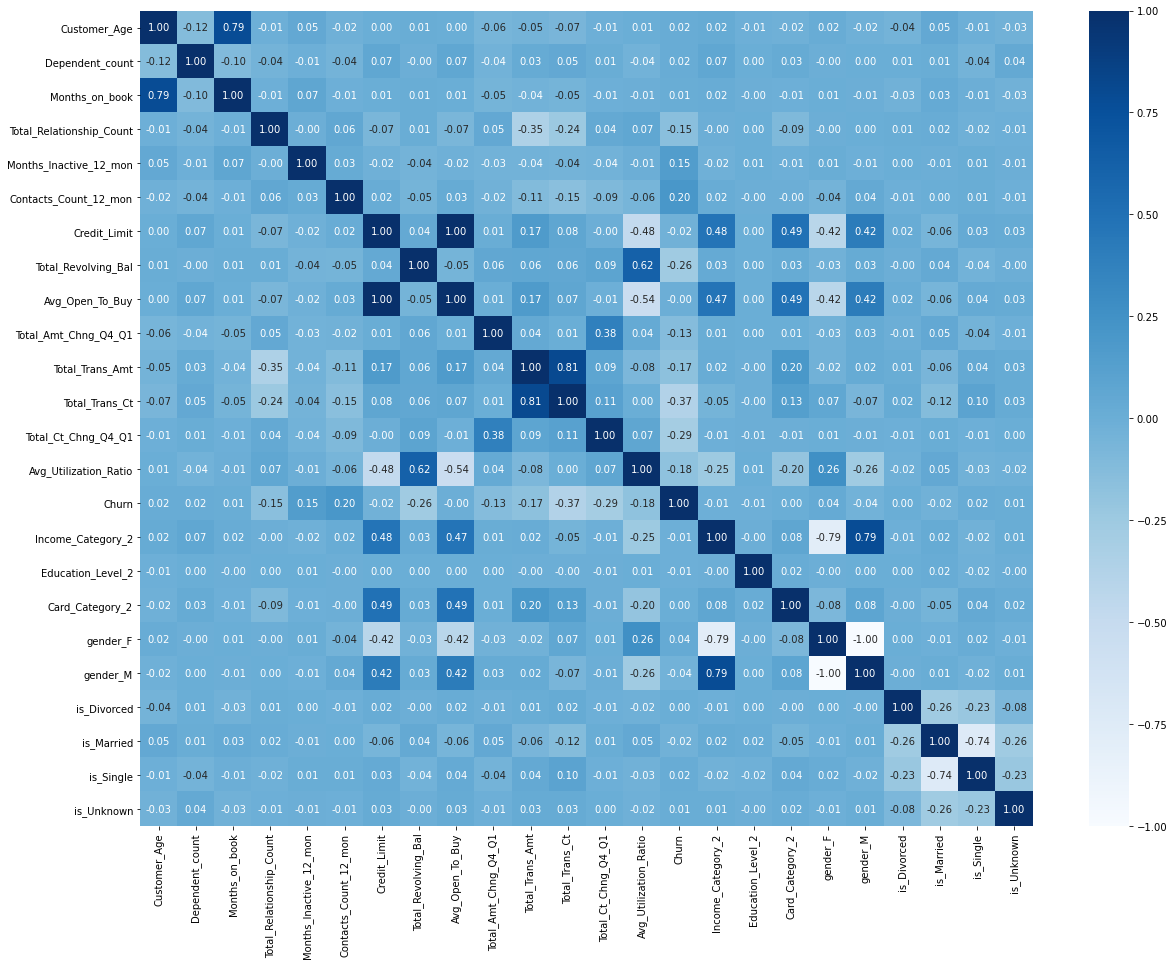

In [46]:
a = plt.figure(figsize=(20, 15))
sns.heatmap(df1_encoded2.corr(), cmap='Blues', annot=True, fmt='.2f')
a.savefig('Figure/Heatmap df1_encoded.png')

#### Summary Pearson Correlation Semua Feature terhadap Target ('Churn')

In [47]:
cor = df1_encoded2.corr()

In [48]:
cor_target = abs(cor['Churn'])

In [49]:
cor_target

Customer_Age                0.018203
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count    0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit                0.023873
Total_Revolving_Bal         0.263053
Avg_Open_To_Buy             0.000285
Total_Amt_Chng_Q4_Q1        0.131063
Total_Trans_Amt             0.168598
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Avg_Utilization_Ratio       0.178410
Churn                       1.000000
Income_Category_2           0.013577
Education_Level_2           0.008346
Card_Category_2             0.002354
gender_F                    0.037272
gender_M                    0.037272
is_Divorced                 0.000850
is_Married                  0.023735
is_Single                   0.019037
is_Unknown                  0.008904
Name: Churn, dtype: float64

#### 'Total_Relationship_Count'

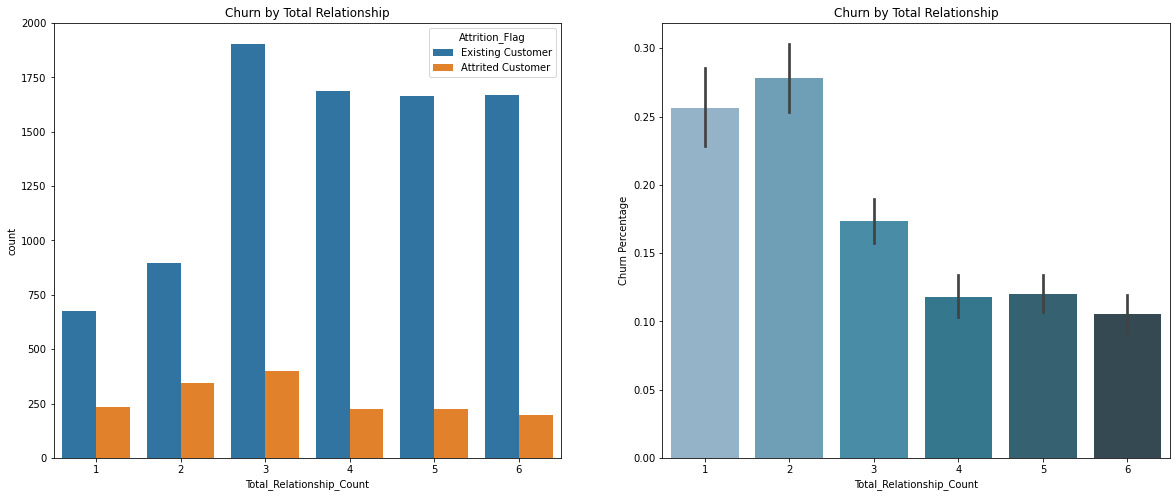

In [50]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
g = sns.countplot('Total_Relationship_Count',hue='Attrition_Flag', data=df1_encoded, ax=ax1,palette="tab10")
ax1.set_title('Churn by Total Relationship')

g = sns.barplot(x='Total_Relationship_Count',y="Churn", data=df1_encoded, ax=ax2)
ax2.set_title('Churn by Total Relationship')
ax2.set_xlabel('Total_Relationship_Count')
ax2.set_ylabel('Churn Percentage')

fig1.savefig('Figure/Total Relationship.png')

#### 'Months_Inactive_12_mon'

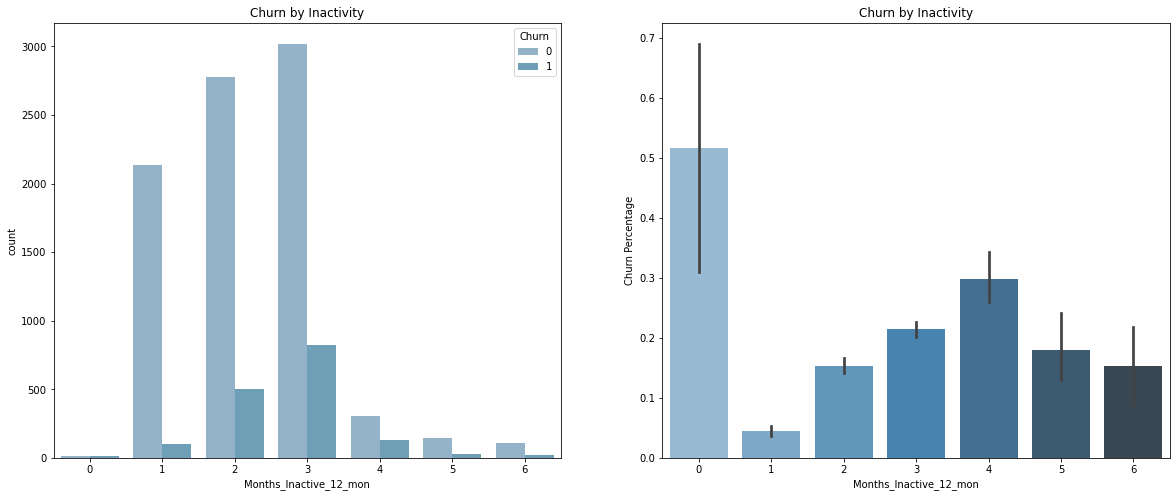

In [51]:
fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
g = sns.countplot('Months_Inactive_12_mon',hue='Churn',data=df1_encoded2,ax=ax1)
ax1.set_title('Churn by Inactivity')

g = sns.barplot(x='Months_Inactive_12_mon',y="Churn",data=df1_encoded2, ax=ax2, palette="Blues_d")
ax2.set_title('Churn by Inactivity')
ax2.set_xlabel('Months_Inactive_12_mon')
ax2.set_ylabel('Churn Percentage')

fig2.savefig('Figure/Inactivity.png')

#### 'Contacts_Count_12_mon'

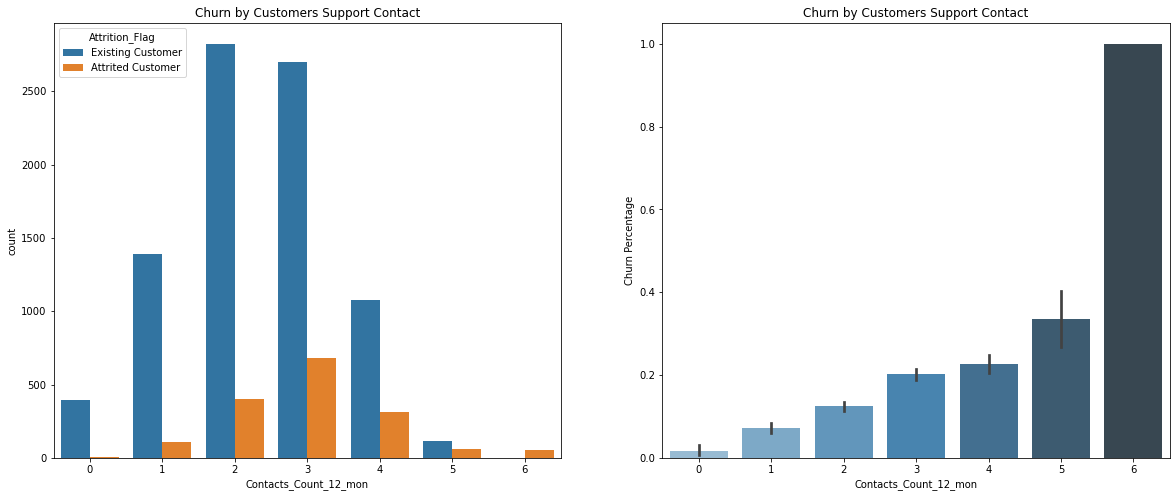

In [52]:
fig3, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
g = sns.countplot('Contacts_Count_12_mon',hue='Attrition_Flag', data=df1_encoded, ax=ax1, palette="tab10")
ax1.set_title('Churn by Customers Support Contact')

g = sns.barplot(x='Contacts_Count_12_mon',y="Churn", data=df1_encoded, ax=ax2, palette="Blues_d")
ax2.set_title('Churn by Customers Support Contact')
ax2.set_xlabel('Contacts_Count_12_mon')
ax2.set_ylabel('Churn Percentage')

fig3.savefig('Figure/Customer Support Contact2.png')

#### 'Total_Revolving_Bal'

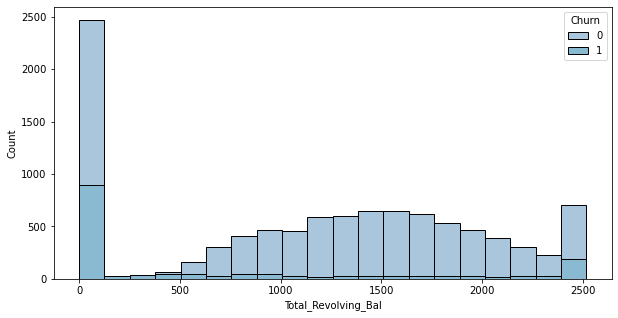

In [53]:
fig4 = plt.figure(figsize=(10, 5))
sns.histplot(data=df1_encoded2, x='Total_Revolving_Bal', hue='Churn', multiple='stack')

fig4.savefig('Figure/fig4.png')

#### 'Total_Amt_Chng_Q4_Q1'

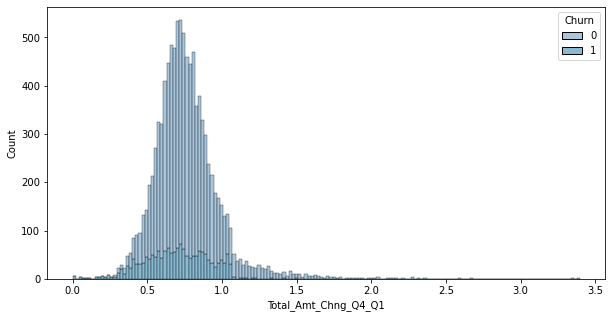

In [54]:
fig5 = plt.figure(figsize=(10, 5))
sns.histplot(data=df1_encoded2, x='Total_Amt_Chng_Q4_Q1', hue='Churn', multiple='stack')

fig5.savefig('Figure/fig5.png')

#### 'Total_Trans_Amt'

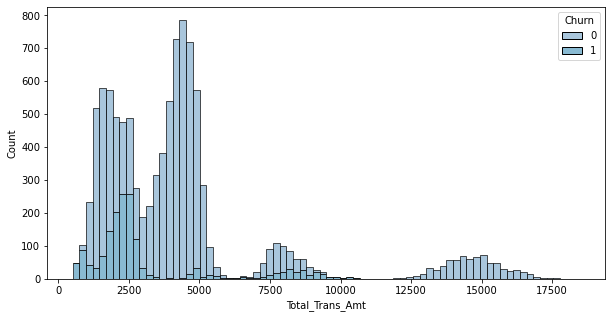

In [55]:
fig6 = plt.figure(figsize=(10, 5))
sns.histplot(data=df1_encoded2, x='Total_Trans_Amt', hue='Churn',multiple='stack')

fig6.savefig('Figure/fig6.png')

#### 'Total_Trans_Ct'

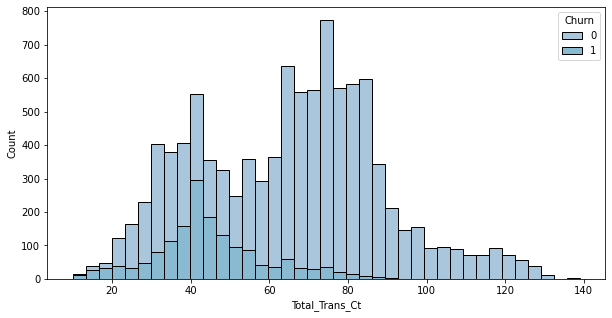

In [56]:
fig7 = plt.figure(figsize=(10, 5))
sns.histplot(data=df1_encoded2, x='Total_Trans_Ct', hue='Churn',multiple='stack')

fig7.savefig('Figure/fig7')

#### 'Total_Ct_Chng_Q4_Q1'

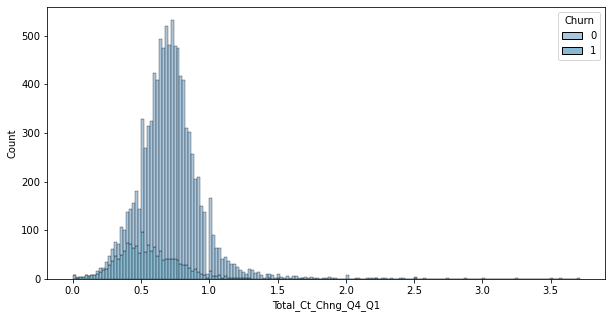

In [57]:
fig8 = plt.figure(figsize=(10, 5))
sns.histplot(data=df1_encoded2, x='Total_Ct_Chng_Q4_Q1', hue='Churn',multiple='stack')

fig8.savefig('Figure/fig8.png')

#### 'Avg_Utilization_Ratio'

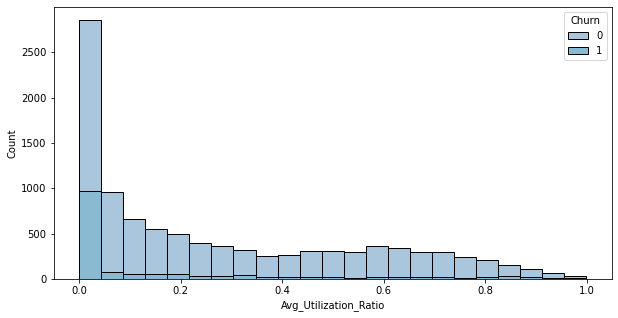

In [58]:
fig9 = plt.figure(figsize=(10, 5))
sns.histplot(data=df1_encoded2, x='Avg_Utilization_Ratio', hue='Churn',multiple='stack')

fig9.savefig('Figure/fig9.png')

## Membersihkan Outliers (setelah EDA dilakukan)

### A. IQR

In [59]:
features = df1_encoded2.columns

In [60]:
df1_encoded2.shape

(10127, 24)

In [61]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1_encoded2)}')

filtered_entries = np.array([True] * len(df1_encoded2))
for col in features:
    Q1 = df1_encoded2[col].quantile(0.25)
    Q3 = df1_encoded2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df1_encoded2[col] >= low_limit) & (df1_encoded2[col] <= high_limit))
    
df1_filtered = df1_encoded2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1_filtered)}')

Jumlah baris sebelum memfilter outlier: 10127
Jumlah baris setelah memfilter outlier: 9378


In [62]:
df1_filtered.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Churn  \
0                  777          11914.0                 1.335  ...      0   
1                  864           7392.0                 1.541  ...      0   
2                    0           3418.0                 2.594  ...      0   
4                    0           4716.0                 2.175  ...      0   
5                 1247           2763.0                 1.376  ...      0   

   Income_Category_2  Education_Level_2  Card_Category_2  gender_F  gender_M  \
0                  3                  2                0         0         1   
1                  1                  4                0         1         0   
2                  4                  4                0         0         1   
4                  3                  1                0         0         1   
5                  2                  4                0         0         1   

   is_Divorced  is_Married  is_Single  is_Unknown  
0            0           1          0           0  
1            0           0          1           0  
2            0           1          0           0  
4            0           1          0           0  
5            0           1          0           0  

[5 rows x 24 columns]

#### Boxplot, IQR

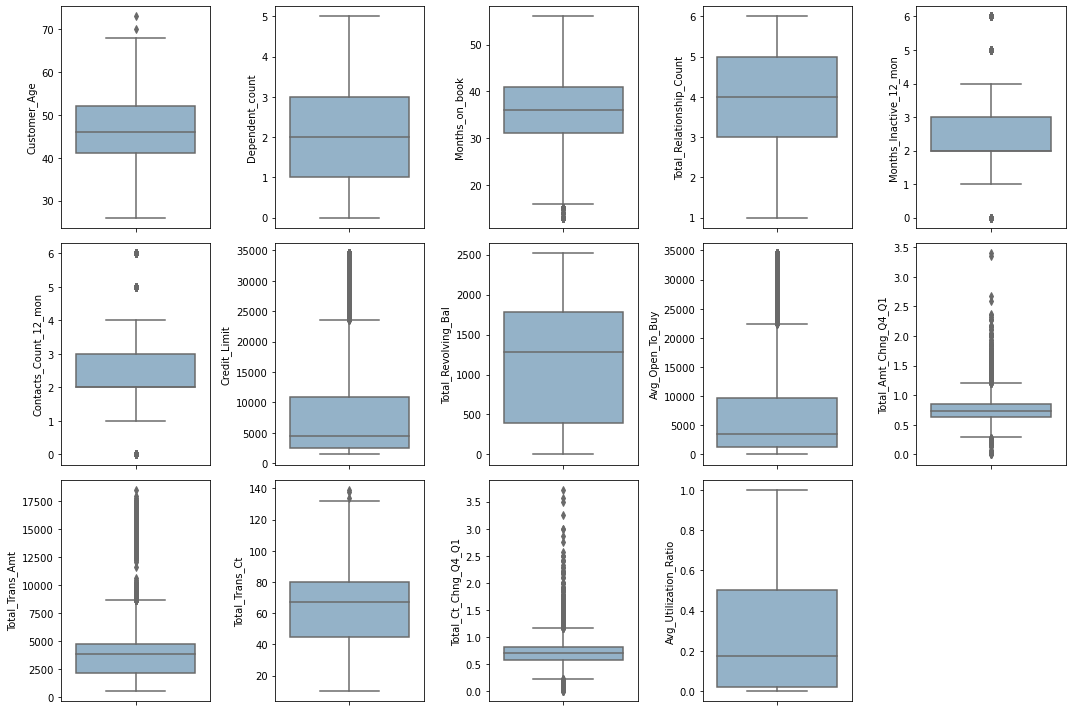

In [63]:
fig10 = plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df1_filtered[num[i]])
    plt.tight_layout()
    
fig10.savefig('Figure/fig10.png')

#### Distplot, IQR

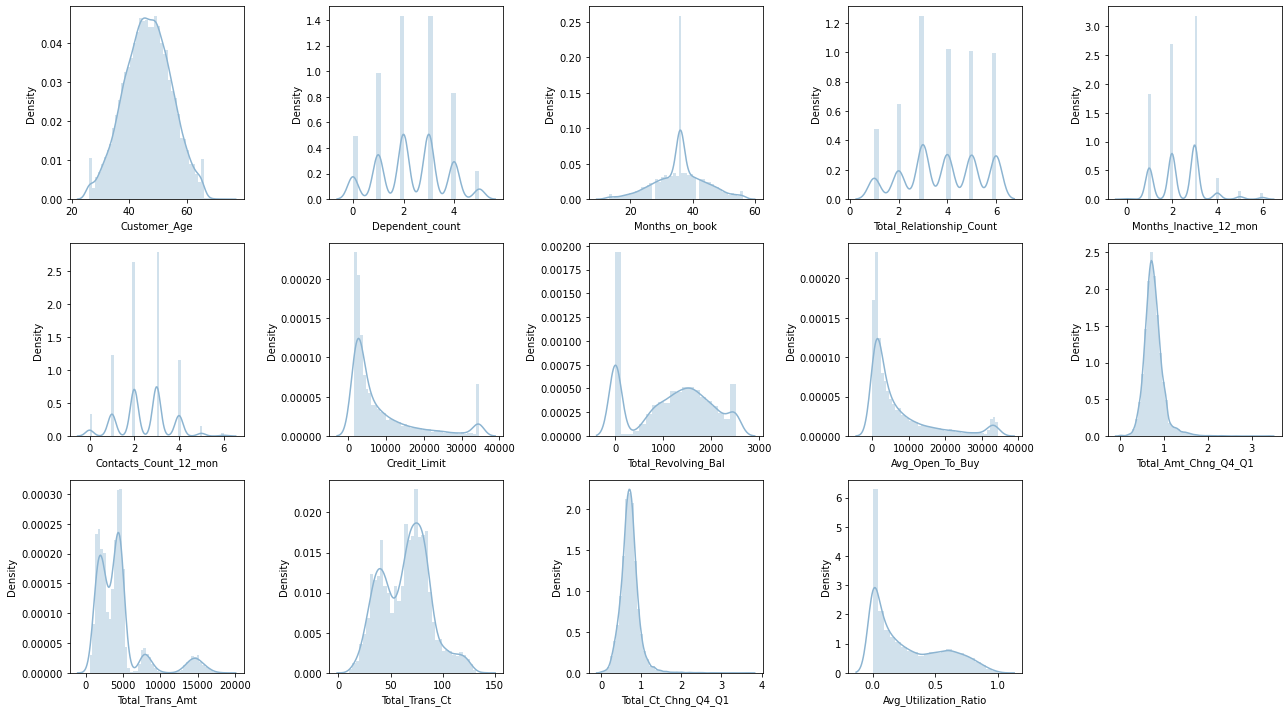

In [64]:
fig11 = plt.figure(figsize=(18,10))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df1_filtered[num[i]])
    plt.tight_layout()
    
fig11.savefig('Figure/fig11.png')

### B. Z-Score

In [65]:
from scipy import stats

In [66]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1_encoded2)}')

filtered_entries = np.array([True] * len(df1_encoded2))
for col in features:
    zscore = abs(stats.zscore(df1_encoded2[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df1_filtered2 = df1_encoded2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1_filtered2)}')

Jumlah baris sebelum memfilter outlier: 10127
Jumlah baris setelah memfilter outlier: 7841


#### Boxplot, Z-Score

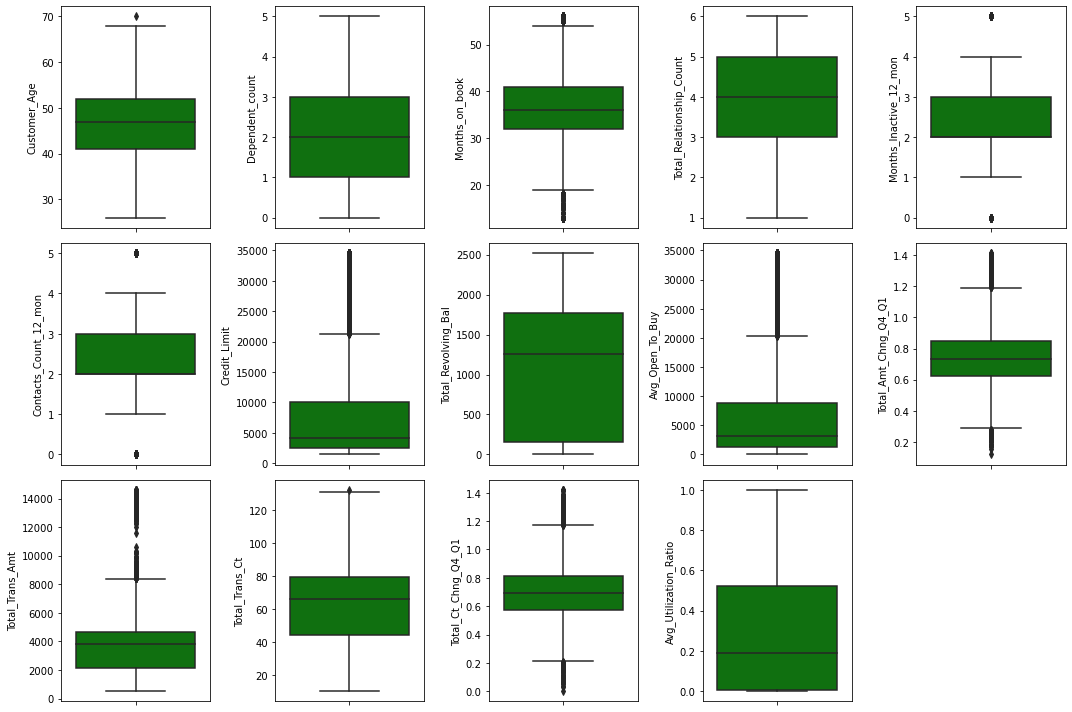

In [67]:
fig12 = plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df1_filtered2[num[i]], color='g')
    plt.tight_layout()
    
fig12.savefig('Figure/fig12.png')

#### Distplot, Z-Score

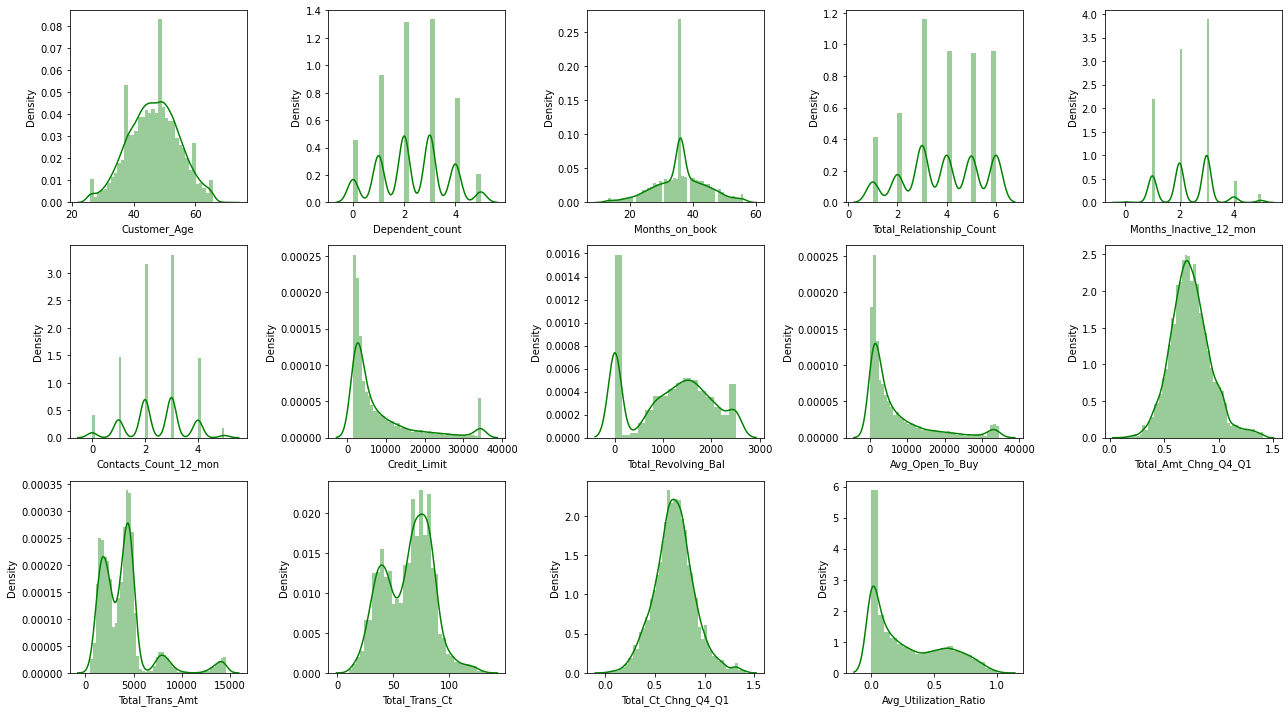

In [68]:
fig13 = plt.figure(figsize=(18,10))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df1_filtered2[num[i]], color='g')
    plt.tight_layout()
    
fig13.savefig('Figure/fig13.png')

## Normalization/Standardization

Menggunakan data yang telah difilter dengan metode IQR

In [69]:
df1_norm = df1_filtered.copy()
df1_std = df1_filtered.copy()

### A. Normalization

In [70]:
num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [71]:
n = '_norm'
num_norm = []

for i in num:
    val = i+n
    num_norm.append(val)
        
num_norm

['Customer_Age_norm',
 'Dependent_count_norm',
 'Months_on_book_norm',
 'Total_Relationship_Count_norm',
 'Months_Inactive_12_mon_norm',
 'Contacts_Count_12_mon_norm',
 'Credit_Limit_norm',
 'Total_Revolving_Bal_norm',
 'Avg_Open_To_Buy_norm',
 'Total_Amt_Chng_Q4_Q1_norm',
 'Total_Trans_Amt_norm',
 'Total_Trans_Ct_norm',
 'Total_Ct_Chng_Q4_Q1_norm',
 'Avg_Utilization_Ratio_norm']

In [72]:
from sklearn.preprocessing import MinMaxScaler

for i in range(0, len(num)):
    df1_norm[num_norm[i]] = MinMaxScaler().fit_transform(df1_norm[num[i]].values.reshape(len(df1_norm), 1))

df1_norm.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
4                    0           4716.0                 2.175  ...   
5                 1247           2763.0                 1.376  ...   

   Months_Inactive_12_mon_norm  Contacts_Count_12_mon_norm  Credit_Limit_norm  \
0                     0.166667                    0.500000           0.340190   
1                     0.166667                    0.333333           0.206112   
2                     0.166667                    0.000000           0.059850   
4                     0.166667                    0.000000           0.099091   
5                     0.166667                    0.333333           0.077747   

   Total_Revolving_Bal_norm  Avg_Open_To_Buy_norm  Total_Amt_Chng_Q4_Q1_norm  \
0                  0.308701              0.345116                   0.392994   
1                  0.343266              0.214093                   0.453636   
2                  0.000000              0.098948                   0.763615   
4                  0.000000              0.136557                   0.640271   
5                  0.495431              0.079970                   0.405063   

   Total_Trans_Amt_norm  Total_Trans_Ct_norm  Total_Ct_Chng_Q4_Q1_norm  \
0              0.035273             0.248062                  0.437534   
1              0.043452             0.178295                  1.000000   
2              0.076611             0.077519                  0.628164   
4              0.017025             0.139535                  0.673129   
5              0.032158             0.108527                  0.227787   

   Avg_Utilization_Ratio_norm  
0                    0.061061  
1                    0.105105  
2                    0.000000  
4                    0.000000  
5                    0.311311  

[5 rows x 38 columns]

### B. Standardization

In [73]:
num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [74]:
s = '_std'
num_std = []

for i in num:
    val = i+s
    num_std.append(val)

num_std

['Customer_Age_std',
 'Dependent_count_std',
 'Months_on_book_std',
 'Total_Relationship_Count_std',
 'Months_Inactive_12_mon_std',
 'Contacts_Count_12_mon_std',
 'Credit_Limit_std',
 'Total_Revolving_Bal_std',
 'Avg_Open_To_Buy_std',
 'Total_Amt_Chng_Q4_Q1_std',
 'Total_Trans_Amt_std',
 'Total_Trans_Ct_std',
 'Total_Ct_Chng_Q4_Q1_std',
 'Avg_Utilization_Ratio_std']

In [75]:
from sklearn.preprocessing import StandardScaler

for i in range(0, len(num)):
    df1_std[num_std[i]] = StandardScaler().fit_transform(df1_std[num[i]].values.reshape(len(df1_std), 1))

df1_std.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
4                    0           4716.0                 2.175  ...   
5                 1247           2763.0                 1.376  ...   

   Months_Inactive_12_mon_std  Contacts_Count_12_mon_std  Credit_Limit_std  \
0                   -1.331567                   0.488275          0.455836   
1                   -1.331567                  -0.413111         -0.034375   
2                   -1.331567                  -2.215883         -0.569131   
4                   -1.331567                  -2.215883         -0.425660   
5                   -1.331567                  -0.413111         -0.503696   

   Total_Revolving_Bal_std  Avg_Open_To_Buy_std  Total_Amt_Chng_Q4_Q1_std  \
0                -0.474397             0.498538                  2.594976   
1                -0.367533            -0.001302                  3.525910   
2                -1.428794            -0.440568                  8.284522   
4                -1.428794            -0.297094                  6.391019   
5                 0.102910            -0.512969                  2.780259   

   Total_Trans_Amt_std  Total_Trans_Ct_std  Total_Ct_Chng_Q4_Q1_std  \
0            -0.950553           -0.963441                 3.815948   
1            -0.907357           -1.345828                12.546806   
2            -0.732224           -1.898164                 6.774994   
4            -1.046935           -1.558265                 7.472961   
5            -0.967008           -1.728214                 0.560162   

   Avg_Utilization_Ratio_std  
0                  -0.779703  
1                  -0.620440  
2                  -1.000499  
4                  -1.000499  
5                   0.125200  

[5 rows x 38 columns]

# Modelling

False Negative menjadi concern sehingga parameter paling penting adalah Recall

#### Evaluation

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### 1. Logistic Regression

#### a. df1_norm

In [77]:
#Split Feature and Target
x = df1_norm.drop('Churn', axis=1)
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression(random_state=42)
logres.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = logres.predict(xtest)
eval_classification(logres, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.8955
Precision (Test Set): 0.7582
Recall (Test Set): 0.4759
F1-Score (Test Set): 0.5847
AUC: 0.72


##### Hyperparamter Tuning

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
hyperparameters = dict(penalty=penalty, C=C)

logres = LogisticRegression(random_state=42)
logres_tuned = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

logres_tuned.fit(xtrain, ytrain)
ypred_tuned = logres_tuned.predict(xtest)
eval_classification(logres_tuned, ypred_tuned, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.8788
Precision (Test Set): 0.7080
Recall (Test Set): 0.3678
F1-Score (Test Set): 0.4841
AUC: 0.67


#### b. df1_std

In [79]:
#Split Feature and Target
x = df1_std.drop('Churn', axis=1)
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression(random_state=42)
logres.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = logres.predict(xtest)
eval_classification(logres, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.8991
Precision (Test Set): 0.7309
Recall (Test Set): 0.5494
F1-Score (Test Set): 0.6273
AUC: 0.76


##### Hyperparameter Tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
hyperparameters = dict(penalty=penalty, C=C)

logres = LogisticRegression(random_state=42)
logres_tuned = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

logres_tuned.fit(xtrain, ytrain)
ypred_tuned = logres_tuned.predict(xtest)
eval_classification(logres_tuned, ypred_tuned, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.8920
Precision (Test Set): 0.7885
Recall (Test Set): 0.4115
F1-Score (Test Set): 0.5408
AUC: 0.70


### 2. Decision Tree

#### a. df1_norm

In [81]:
#Split Feature and Target
x = df1_norm.drop('Churn', axis=1)
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = dt.predict(xtest)
eval_classification(dt, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9353
Precision (Test Set): 0.7963
Recall (Test Set): 0.7816
F1-Score (Test Set): 0.7889
AUC: 0.87


#### b. df1_std

In [82]:
#Split Feature and Target
x = df1_std.drop('Churn', axis=1)
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = dt.predict(xtest)
eval_classification(dt, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9357
Precision (Test Set): 0.7981
Recall (Test Set): 0.7816
F1-Score (Test Set): 0.7898
AUC: 0.87


### 3. Random Forest

#### a. df1_norm

In [83]:
#Split Feature and Target
x = df1_norm.drop('Churn', axis=1)
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9627
Precision (Test Set): 0.9412
Recall (Test Set): 0.8092
F1-Score (Test Set): 0.8702
AUC: 0.90


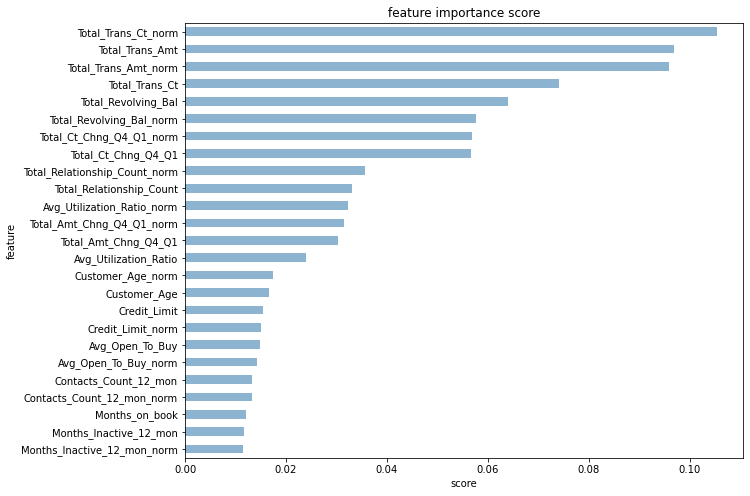

In [84]:
show_feature_importance(rf) # Untuk df1_norm

#### b. df1_std

In [85]:
#Split Feature and Target
x = df1_std.drop('Churn', axis=1)
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9630
Precision (Test Set): 0.9437
Recall (Test Set): 0.8092
F1-Score (Test Set): 0.8713
AUC: 0.90


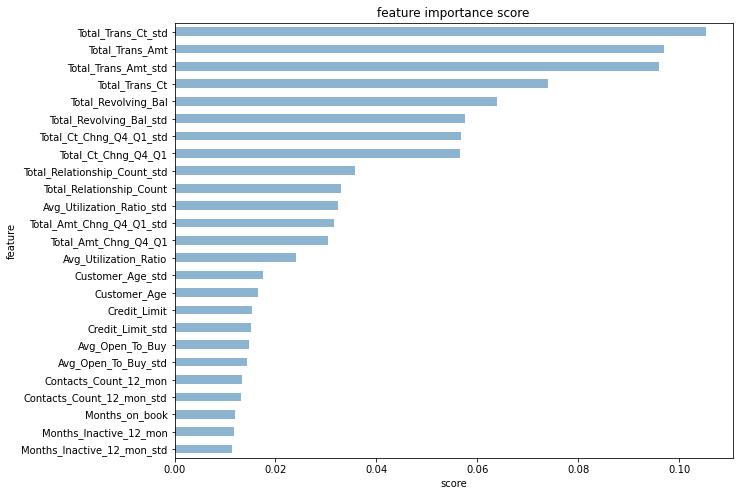

In [86]:
show_feature_importance(rf) # Untuk df1_std

#### Menghapus Feature yang Memiliki Score Rendah (Lv 1)

#### a. df1_norm

In [87]:
#Split Feature and Target
x = df1_norm.drop(columns=['Churn', 'Customer_Age_norm', 'Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy',
                  'Credit_Limit_norm', 'Contacts_Count_12_mon_norm', 'Avg_Open_To_Buy_norm',
                  'Contacts_Count_12_mon', 'Months_on_book_norm', 'Months_Inactive_12_mon', 'Months_Inactive_12_mon_norm'], axis=1)
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9602
Precision (Test Set): 0.9173
Recall (Test Set): 0.8161
F1-Score (Test Set): 0.8637
AUC: 0.90


#### b. df1_std

In [88]:
#Split Feature and Target
x = df1_std.drop(columns=['Churn', 'Customer_Age_std', 'Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy',
                  'Credit_Limit_std', 'Contacts_Count_12_mon_std', 'Avg_Open_To_Buy_std',
                  'Contacts_Count_12_mon', 'Months_on_book_std', 'Months_Inactive_12_mon', 'Months_Inactive_12_mon_std'], axis=1)
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9602
Precision (Test Set): 0.9195
Recall (Test Set): 0.8138
F1-Score (Test Set): 0.8634
AUC: 0.90


Penghapusan kolom yang memiliki Score rendah dapat menaikkan Recall

#### Menghapus Feature yang Memiliki Score Rendah (Lv 1) dan yang Redundan

#### a. df1_norm

In [89]:
#Split Feature and Target
x = df1_norm.drop(columns=['Churn', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                                'Total_Revolving_Bal_norm', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1',
                                'Avg_Utilization_Ratio', 'Customer_Age_norm', 'Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy',
                                'Credit_Limit_norm', 'Contacts_Count_12_mon_norm', 'Avg_Open_To_Buy_norm',
                                 'Contacts_Count_12_mon', 'Months_on_book_norm', 'Months_Inactive_12_mon', 'Months_Inactive_12_mon_norm'], axis=1)
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9527
Precision (Test Set): 0.9081
Recall (Test Set): 0.7724
F1-Score (Test Set): 0.8348
AUC: 0.88


#### b. df1_std

In [90]:
x = df1_std.drop(columns=['Churn', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                                'Total_Revolving_Bal_std', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1',
                                'Avg_Utilization_Ratio', 'Customer_Age_std', 'Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy',
                                'Credit_Limit_std', 'Contacts_Count_12_mon_std', 'Avg_Open_To_Buy_std',
                                 'Contacts_Count_12_mon', 'Months_on_book_std', 'Months_Inactive_12_mon', 'Months_Inactive_12_mon_std'], axis=1)
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9527
Precision (Test Set): 0.9103
Recall (Test Set): 0.7701
F1-Score (Test Set): 0.8344
AUC: 0.88


Penghapusan feature yang redundan tidak lebih baik dari penghapusan data sebelumnya

#### Menghapus Feature yang Memiliki Score Rendah (Lv 2)

#### a. df1_norm

In [91]:
#Split Feature and Target
x = df1_norm.drop(columns=['Churn', 'Total_Relationship_Count_norm', 'Total_Relationship_Count',
                                'Total_Amt_Chng_Q4_Q1_norm', 'Avg_Utilization_Ratio_norm', 'Total_Amt_Chng_Q4_Q1',
                                'Avg_Utilization_Ratio', 'Customer_Age_norm', 'Customer_Age', 'Credit_Limit',
                                'Avg_Open_To_Buy', 'Credit_Limit_norm', 'Contacts_Count_12_mon_norm', 'Avg_Open_To_Buy_norm',
                                'Contacts_Count_12_mon', 'Months_on_book_norm', 'Months_Inactive_12_mon', 'Months_Inactive_12_mon_norm'], axis=1)
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9460
Precision (Test Set): 0.8753
Recall (Test Set): 0.7586
F1-Score (Test Set): 0.8128
AUC: 0.87


#### b. df1_std

In [92]:
#Split Feature and Target
x = df1_std.drop(columns=['Churn', 'Total_Relationship_Count_std', 'Total_Relationship_Count',
                                'Total_Amt_Chng_Q4_Q1_std', 'Avg_Utilization_Ratio_std', 'Total_Amt_Chng_Q4_Q1',
                                'Avg_Utilization_Ratio', 'Customer_Age_std', 'Customer_Age', 'Credit_Limit',
                                'Avg_Open_To_Buy', 'Credit_Limit_std', 'Contacts_Count_12_mon_std', 'Avg_Open_To_Buy_std',
                                'Contacts_Count_12_mon', 'Months_on_book_std', 'Months_Inactive_12_mon', 'Months_Inactive_12_mon_std'], axis=1)
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9460
Precision (Test Set): 0.8753
Recall (Test Set): 0.7586
F1-Score (Test Set): 0.8128
AUC: 0.87


Pengahapusan feature hingga Lv 2 tidak lebih baik hasilnya dari pada penghapusan feature Lv 1

### 4. XGBoost

#### a. df1_norm

In [93]:
#Split Feature and Target
x = df1_norm.drop(columns=['Churn'], axis=1)
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9726
Precision (Test Set): 0.9431
Recall (Test Set): 0.8759
F1-Score (Test Set): 0.9082
AUC: 0.93


#### b. df1_std

In [94]:
#Split Feature and Target
x = df1_std.drop(columns=['Churn'], axis=1)
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9726
Precision (Test Set): 0.9431
Recall (Test Set): 0.8759
F1-Score (Test Set): 0.9082
AUC: 0.93


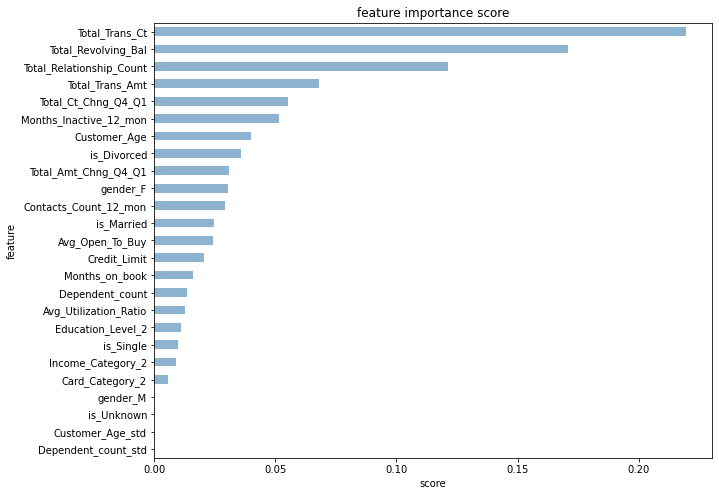

In [95]:
show_feature_importance(xg)

#### Mengambil Feature Teratas 

#### a. df1_norm

In [96]:
#Split Feature and Target
x = df1_norm[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt',
                 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon', 'Customer_Age', 'is_Divorced', 
                 'Total_Amt_Chng_Q4_Q1', 'gender_F', 'Contacts_Count_12_mon', 'is_Married', 'Avg_Open_To_Buy']]
y = df1_norm['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9744
Precision (Test Set): 0.9549
Recall (Test Set): 0.8759
F1-Score (Test Set): 0.9137
AUC: 0.93


#### b. df1_std

In [97]:
#Split Feature and Target
x = df1_std[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt',
                 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon', 'Customer_Age', 'is_Divorced', 
                 'Total_Amt_Chng_Q4_Q1', 'gender_F', 'Contacts_Count_12_mon', 'is_Married', 'Avg_Open_To_Buy']]
y = df1_std['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9744
Precision (Test Set): 0.9549
Recall (Test Set): 0.8759
F1-Score (Test Set): 0.9137
AUC: 0.93


Pengambilan feature yang memiliki score tinggi memiliki hasil yang lebih baik di metrics Accuracy jika dibandingkan model sebelumnya

## Feature Engineering

Data yang digunakan adalah df1_std

#### Membuat Feature Berdasarkan 'Total_Amt_Chng_Q4_Q1'

In [98]:
df_fe = df1_std.copy()

In [99]:
tac = []
for i, col in df_fe.iterrows():
    if df_fe['Total_Amt_Chng_Q4_Q1'][i] <= 1.1:
        ket4 = 1
    else:
        ket4 = 0
    tac.append(ket4)

df_fe['Lower_TAC'] = tac

### XGBoost

In [100]:
#Split Feature and Target
x = df_fe.drop('Churn', axis=1)
y = df_fe['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9726
Precision (Test Set): 0.9431
Recall (Test Set): 0.8759
F1-Score (Test Set): 0.9082
AUC: 0.93


Hasil tidak lebih baik dari data sebelumnya

# Case 2: Mengisi Nilai Unknown

In [101]:
df2_pre = df.copy()

In [102]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [103]:
df2_pre.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [104]:
df2_pre.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

##### Mengisi tiap feature yang bernilai 'Unknown' dengan nilai modus dari masing-masing feature

In [105]:
for col in df2_pre:
    df2_pre[col].replace('Unknown', np.NaN, inplace=True)

In [106]:
df2_pre.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [107]:
df2_pre['Education_Level'].fillna(df2_pre['Education_Level'].mode()[0], inplace=True)
df2_pre['Marital_Status'].fillna(df2_pre['Marital_Status'].mode()[0], inplace=True)
df2_pre['Income_Category'].fillna(df2_pre['Income_Category'].mode()[0], inplace=True)

In [108]:
df2_pre.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Feature Engineering

In [109]:
df2_encoded = df2_pre.copy()

### A. Label Encoding 

#### 1. Feature 'Churn'

In [110]:
churn = []
for i, col in df2_encoded.iterrows():
    if df2_encoded['Attrition_Flag'][i]=='Attrited Customer':
        value = 1
    else:
        value = 0
    churn.append(value)

df2_encoded['Churn'] = churn

#### 2. Feature 'Income_Category_2'

In [111]:
ic = []
for i, col in df2_encoded.iterrows():
    if df2_encoded['Income_Category'][i]=='Less than $40K':
        ket1 = 0
    elif df2_encoded['Income_Category'][i]=='$40K - $60K':
        ket1 = 1
    elif df2_encoded['Income_Category'][i]=='$60K - $80K':
        ket1 = 2
    elif df2_encoded['Income_Category'][i]=='$80K - $120K':
        ket1 = 3
    else:
        ket1 = 4
    ic.append(ket1)

df2_encoded['Income_Category_2'] = ic

#### 3. Feature 'Education_Level_2'

In [112]:
el = []
for i, col in df2_encoded.iterrows():
    if df2_encoded['Education_Level'][i]=='Uneducated':
        ket2 = 0
    elif df2_encoded['Education_Level'][i]=='High School':
        ket2 = 1
    elif df2_encoded['Education_Level'][i]=='College':
        ket2 = 2
    elif df2_encoded['Education_Level'][i]=='Graduate':
        ket2 = 3
    elif df2_encoded['Education_Level'][i]=='Post-Graduate':
        ket2 = 4
    else:
        ket = 5
    el.append(ket2)

df2_encoded['Education_Level_2'] = el

#### 4. Feature 'Card_Category_2'

In [113]:
cc = []
for i, col in df2_encoded.iterrows():
    if df2_encoded['Card_Category'][i]=='Blue':
        ket3 = 0
    elif df2_encoded['Card_Category'][i]=='Silver':
        ket3 = 1
    elif df2_encoded['Card_Category'][i]=='Gold':
        ket3 = 2
    else:
        ket3 = 3
    cc.append(ket3)

df2_encoded['Card_Category_2'] = cc

### B. One-Hot Encoding

#### 1. Feature 'Gender'

In [114]:
ohe_g = pd.get_dummies(df2_encoded['Gender'], prefix='gender')
ohe_g.head()

gender_F  gender_M
0         0         1
1         1         0
2         0         1
3         1         0
4         0         1

#### 2. Feature 'Marital_Status'

In [115]:
ohe_ms = pd.get_dummies(df2_encoded['Marital_Status'], prefix='is')
ohe_ms.head()

is_Divorced  is_Married  is_Single
0            0           1          0
1            0           0          1
2            0           1          0
3            0           1          0
4            0           1          0

### Menggabungkan Data

In [116]:
df2_encoded = pd.concat([df2_encoded, ohe_g, ohe_ms], axis=1)

In [117]:
df2_encoded.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Avg_Utilization_Ratio  Churn  \
0                         5  ...                  0.061      0   
1                         6  ...                  0.105      0   
2                         4  ...                  0.000      0   
3                         3  ...                  0.760      0   
4                         5  ...                  0.000      0   

   Income_Category_2  Education_Level_2  Card_Category_2  gender_F  gender_M  \
0                  2                  1                0         0         1   
1                  0                  3                0         1         0   
2                  3                  3                0         0         1   
3                  0                  1                0         1         0   
4                  2                  0                0         0         1   

   is_Divorced  is_Married  is_Single  
0            0           1          0  
1            0           0          1  
2            0           1          0  
3            0           1          0  
4            0           1          0  

[5 rows x 29 columns]

### Menghapus Data Categorical

In [118]:
df2_encoded.drop(columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], inplace=True)

In [119]:
df2_encoded.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn', 'Income_Category_2', 'Education_Level_2', 'Card_Category_2',
       'gender_F', 'gender_M', 'is_Divorced', 'is_Married', 'is_Single'],
      dtype='object')

## Modelling

### 1. Logistic Regression

In [120]:
# Split Feature and Target
x = df2_encoded.drop('Churn', axis=1)
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression(random_state=42)
logres.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = logres.predict(xtest)
eval_classification(logres, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.8657
Precision (Test Set): 0.6507
Recall (Test Set): 0.3831
F1-Score (Test Set): 0.4822
AUC: 0.67


### 2. Decision Tree

In [121]:
# Split Feature and Target
x = df2_encoded.drop('Churn', axis=1)
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = dt.predict(xtest)
eval_classification(dt, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9325
Precision (Test Set): 0.8050
Recall (Test Set): 0.7742
F1-Score (Test Set): 0.7893
AUC: 0.87


### 3. Random Forest

In [122]:
#Split Feature and Target
x = df2_encoded.drop('Churn', axis=1)
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9552
Precision (Test Set): 0.9306
Recall (Test Set): 0.7843
F1-Score (Test Set): 0.8512
AUC: 0.89


### 4. XGBoost

In [123]:
# Split Feature and Target
x = df2_encoded.drop('Churn', axis=1)
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9631
Precision (Test Set): 0.8951
Recall (Test Set): 0.8770
F1-Score (Test Set): 0.8859
AUC: 0.93


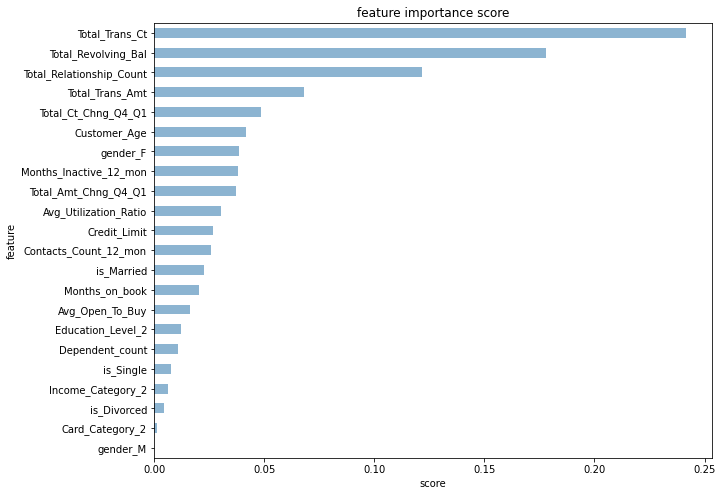

In [124]:
p = show_feature_importance(xg)
plt.savefig('tes.png')

#### Mengambil 10 Feature Teratas

In [125]:
#Split Feature and Target
x = df2_encoded[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 
                'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Customer_Age', 'Months_Inactive_12_mon',
                'Total_Amt_Chng_Q4_Q1', 'gender_F', 'Contacts_Count_12_mon']]
y = df2_encoded['Churn']

#Split Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9641
Precision (Test Set): 0.9111
Recall (Test Set): 0.8607
F1-Score (Test Set): 0.8851
AUC: 0.92


#### Mengambil 11 Feature Teratas

In [126]:
#Split Feature and Target
x = df2_encoded[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 
                'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Customer_Age', 'Months_Inactive_12_mon',
                'Total_Amt_Chng_Q4_Q1', 'gender_F', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio']]
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9684
Precision (Test Set): 0.9082
Recall (Test Set): 0.8972
F1-Score (Test Set): 0.9026
AUC: 0.94


In [127]:
ytest.value_counts()

0    2543
1     496
Name: Churn, dtype: int64

In [128]:
ytrain.value_counts()

0    5957
1    1131
Name: Churn, dtype: int64

##### Hyperparameter Tuning

In [129]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [4],
                    #'min_child_weight' : [int(x) for x in np.linspace(0, 100, num = 101)]
                    #'gamma' : [float(x) for x in np.linspace(0, 1, num = 10)],
                    'tree_method' : ['approx']
                    #'subsample': [float(x) for x in np.linspace(0, 1, num = 11)]

                    #'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 22)],
                    #'eta' : [float(x) for x in np.linspace(0, 1, num = 100)]

                    #'lambda' : [float(x) for x in np.linspace(0, 1, num = 100)]
                    #'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(xtrain,ytrain)

# Predict & Evaluation
ypred = xg_tuned.predict(xtest)#Check performa dari model
eval_classification(xg_tuned, ypred, xtrain, ytrain, xtest, ytest)

[21:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [130]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 4
Best tree_method: approx


##### Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[2497,   46],
       [  44,  452]], dtype=int64)

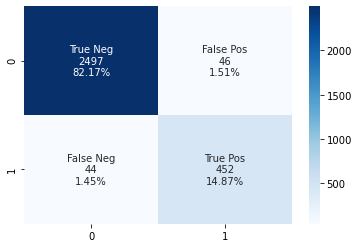

In [132]:
cm_fig = plt.figure()
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
cm_fig.savefig('Figure/Confusion Matrix.png')

#### Mengambil 12 Feature Teratas

In [133]:
#Split Feature and Target
x = df2_encoded[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 
                'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Customer_Age', 'Months_Inactive_12_mon',
                'Total_Amt_Chng_Q4_Q1', 'gender_F', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio',
                'Credit_Limit']]
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9638
Precision (Test Set): 0.8955
Recall (Test Set): 0.8810
F1-Score (Test Set): 0.8882
AUC: 0.93


**Pengambilan 11 features teratas berdasarkan feature importance merupakan hasil recall tertinggi di antara semua model yang telah dicoba**

### 5. AdaBoost

In [134]:
#Split Feature and Target
x = df2_encoded.drop('Churn', axis=1)
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = ab.predict(xtest)
eval_classification(ab, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9549
Precision (Test Set): 0.8860
Recall (Test Set): 0.8306
F1-Score (Test Set): 0.8574
AUC: 0.90


### 6. CatBoost

In [135]:
#Split Feature and Target
x = df2_encoded.drop('Churn', axis=1)
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100, learning_rate=0.11)
cb.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = cb.predict(xtest)
eval_classification(cb, ypred, xtrain, ytrain, xtest, ytest)

0:	learn: 0.5601793	total: 303ms	remaining: 30s
1:	learn: 0.4674197	total: 312ms	remaining: 15.3s
2:	learn: 0.4000975	total: 321ms	remaining: 10.4s
3:	learn: 0.3313442	total: 330ms	remaining: 7.93s
4:	learn: 0.2970435	total: 339ms	remaining: 6.44s
5:	learn: 0.2734274	total: 349ms	remaining: 5.47s
6:	learn: 0.2546812	total: 361ms	remaining: 4.8s
7:	learn: 0.2378537	total: 373ms	remaining: 4.29s
8:	learn: 0.2272469	total: 383ms	remaining: 3.88s
9:	learn: 0.2128909	total: 395ms	remaining: 3.56s
10:	learn: 0.2027840	total: 405ms	remaining: 3.27s
11:	learn: 0.1878670	total: 413ms	remaining: 3.03s
12:	learn: 0.1816583	total: 423ms	remaining: 2.83s
13:	learn: 0.1694784	total: 431ms	remaining: 2.65s
14:	learn: 0.1635332	total: 441ms	remaining: 2.5s
15:	learn: 0.1558246	total: 454ms	remaining: 2.38s
16:	learn: 0.1513136	total: 468ms	remaining: 2.29s
17:	learn: 0.1474815	total: 480ms	remaining: 2.19s
18:	learn: 0.1405374	total: 492ms	remaining: 2.1s
19:	learn: 0.1380566	total: 506ms	remaining: 2

# Case 3: Menghapus Nilai 'Unknown'

In [136]:
df3_pre = df.copy()

In [137]:
df3_pre.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

#### Menghapus data yang bernilai 'Unknown'

In [138]:
for col in df3_pre:
    df3_pre[col].replace('Unknown', np.NaN, inplace=True)

In [139]:
df3_pre.dropna()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
4      Existing Customer            40      M                3   
5      Existing Customer            44      M                2   
...                  ...           ...    ...              ...   
10120  Existing Customer            54      M                1   
10121  Existing Customer            56      F                1   
10122  Existing Customer            50      M                2   
10124  Attrited Customer            44      F                1   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
5            Graduate        Married     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
4                  21                         5                       1   
5                  36                         3                       1   
...               ...                       ...                     ...   
10120              34                         5                       2   
10121              50                         4                       1   
10122              40                         3                       2   
10124              36                         5                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
4                          0        4716.0                    0   
5                          2        4010.0                 1247   
...                      ...           ...                  ...   
10120                      0       13940.0                 2109   
10121                      4        3688.0                  606   
10122                      3        4003.0                 1851   
10124                      4        5409.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
4               4716.0                 2.175              816              28   
5               2763.0                 1.376             1088              24   
...                ...                   ...              ...             ...   
10120          11831.0                 0.660            15577             114   
10121           3082.0

In [140]:
df3_encoded = df3_pre.copy()

## Feature Engineering

### A. Label Encoding

#### 1. Feature 'Churn'

In [141]:
churn = []
for i, col in df3_encoded.iterrows():
    if df3_encoded['Attrition_Flag'][i]=='Attrited Customer':
        value = 1
    else:
        value = 0
    churn.append(value)

df3_encoded['Churn'] = churn

#### 2. Feature 'Income_Category_2'

In [142]:
ic = []
for i, col in df3_encoded.iterrows():
    if df3_encoded['Income_Category'][i]=='Less than $40K':
        ket1 = 0
    elif df3_encoded['Income_Category'][i]=='$40K - $60K':
        ket1 = 1
    elif df3_encoded['Income_Category'][i]=='$60K - $80K':
        ket1 = 2
    elif df3_encoded['Income_Category'][i]=='$80K - $120K':
        ket1 = 3
    else:
        ket1 = 4
    ic.append(ket1)

df3_encoded['Income_Category_2'] = ic

#### 3. Feature 'Education_Level_2'

In [143]:
el = []
for i, col in df3_encoded.iterrows():
    if df3_encoded['Education_Level'][i]=='Uneducated':
        ket2 = 0
    elif df3_encoded['Education_Level'][i]=='High School':
        ket2 = 1
    elif df3_encoded['Education_Level'][i]=='College':
        ket3 = 2
    elif df3_encoded['Education_Level'][i]=='Graduate':
        ket2 = 3
    elif df3_encoded['Education_Level'][i]=='Post-Graduate':
        ket2 = 4
    else:
        ket = 5
    el.append(ket2)

df3_encoded['Education_Level_2'] = el

#### 4. Feature 'Card_Category_2'

In [144]:
cc = []
for i, col in df3_encoded.iterrows():
    if df3_encoded['Card_Category'][i]=='Blue':
        ket3 = 0
    elif df3_encoded['Card_Category'][i]=='Silver':
        ket3 = 1
    elif df3_encoded['Card_Category'][i]=='Gold':
        ket3 = 2
    else:
        ket3 = 3
    cc.append(ket3)

df3_encoded['Card_Category_2'] = cc

### B. One-Hot Encoding

#### 1. Feature 'Gender'

In [145]:
ohe_g = pd.get_dummies(df3_encoded['Gender'], prefix='gender')
ohe_g.head()

gender_F  gender_M
0         0         1
1         1         0
2         0         1
3         1         0
4         0         1

#### 2. Feature 'Marital_Status'

In [146]:
ohe_ms = pd.get_dummies(df3_encoded['Marital_Status'], prefix='is')
ohe_ms.head()

is_Divorced  is_Married  is_Single
0            0           1          0
1            0           0          1
2            0           1          0
3            0           0          0
4            0           1          0

### Menggabungkan Data

In [147]:
df3_encoded = pd.concat([df3_encoded, ohe_g, ohe_ms], axis=1)

In [148]:
df3_encoded.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3            NaN  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Avg_Utilization_Ratio  Churn  \
0                         5  ...                  0.061      0   
1                         6  ...                  0.105      0   
2                         4  ...                  0.000      0   
3                         3  ...                  0.760      0   
4                         5  ...                  0.000      0   

   Income_Category_2  Education_Level_2  Card_Category_2  gender_F  gender_M  \
0                  2                  1                0         0         1   
1                  0                  3                0         1         0   
2                  3                  3                0         0         1   
3                  0                  1                0         1         0   
4                  2                  0                0         0         1   

   is_Divorced  is_Married  is_Single  
0            0           1          0  
1            0           0          1  
2            0           1          0  
3            0           0          0  
4            0           1          0  

[5 rows x 29 columns]

### Menghapus Data Categorical

In [149]:
df3_encoded.drop(columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], inplace=True)

## Modelling

### RandomForest

In [150]:
#Split Feature and Target
x = df3_encoded.drop('Churn', axis=1)
y = df3_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = rf.predict(xtest)
eval_classification(rf, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9585
Precision (Test Set): 0.9512
Recall (Test Set): 0.7863
F1-Score (Test Set): 0.8609
AUC: 0.89


### XGBoost

In [151]:
# Split Feature and Target
x = df3_encoded.drop('Churn', axis=1)
y = df3_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9638
Precision (Test Set): 0.8939
Recall (Test Set): 0.8831
F1-Score (Test Set): 0.8884
AUC: 0.93


### AdaBoost

In [152]:
#Split Feature and Target
x = df3_encoded.drop('Churn', axis=1)
y = df3_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(xtrain,ytrain)

#Prediction and Evaluation
ypred = ab.predict(xtest)
eval_classification(ab, ypred, xtrain, ytrain, xtest, ytest)

Accuracy (Test Set): 0.9539
Precision (Test Set): 0.8853
Recall (Test Set): 0.8246
F1-Score (Test Set): 0.8539
AUC: 0.90


# Kesimpulan

Setelah dilakukan EDA, Data Pre-Processing, dan Trial-and-Error pada beberapa model, didapat hasil yang paling baik berdasarkan Recall-nya adalah pada saat menggunakan Algoritma XGBoost dengan 11 Feature teratas yang diurutkan berdasarkan Feature Importance Hyperparameter Tuning. Hasil tersebut dapat dilihat di bawah ini

### XGBoost

In [153]:
#Split Feature and Target
x = df2_encoded[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 
                'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Customer_Age', 'Months_Inactive_12_mon',
                'Total_Amt_Chng_Q4_Q1', 'gender_F', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio']]
y = df2_encoded['Churn']

#Split Train and Test Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fitting into Model
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(xtrain, ytrain)

#Prediction and Evaluation
ypred = xg.predict(xtest)
eval_classification(xg, ypred, xtrain, ytrain, xtest, ytest)

[21:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.9684
Precision (Test Set): 0.9082
Recall (Test Set): 0.8972
F1-Score (Test Set): 0.9026
AUC: 0.94


#### Hyperparameter Tuning

In [154]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [4],
                    #'min_child_weight' : [int(x) for x in np.linspace(0, 100, num = 101)]
                    #'gamma' : [float(x) for x in np.linspace(0, 1, num = 10)],
                    'tree_method' : ['approx']

                    #'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 22)],
                    #'eta' : [float(x) for x in np.linspace(0, 1, num = 100)]

                    #'lambda' : [float(x) for x in np.linspace(0, 1, num = 100)]
                    #'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(xtrain,ytrain)

# Predict & Evaluation
ypred = xg_tuned.predict(xtest)#Check performa dari model
eval_classification(xg_tuned, ypred, xtrain, ytrain, xtest, ytest)

[21:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [155]:
from sklearn.metrics import recall_score
ypred1 = xg_tuned.predict(xtrain)
ypred2 = xg_tuned.predict(xtest)
print('Train Recall Score: ', recall_score(ytrain, ypred1))
print('Test Recall Score: ', recall_score(ytest, ypred2))

Train Recall Score:  0.982316534040672
Test Recall Score:  0.9112903225806451


#### Confusion Matrix: Test Data

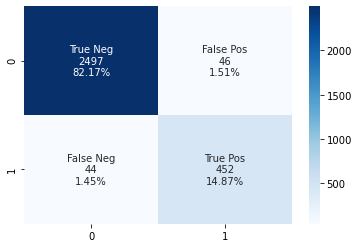

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)

cm_fig = plt.figure()
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
cm_fig.savefig('Figure/Confusion Matrix.png')

#### Confusion Matrix: Train Data

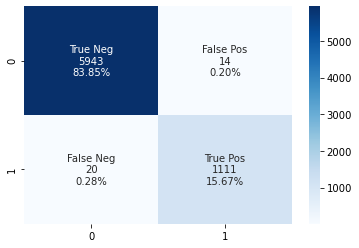

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytrain, ypred1)

cm_fig = plt.figure()
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
cm_fig.savefig('Figure/Confusion Matrix2.png')

In [158]:
!pip install waterfallcharts

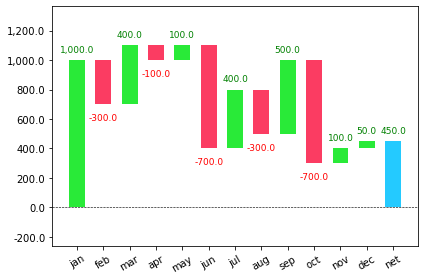

In [159]:
import waterfall_chart
import matplotlib.pyplot as plt
a = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
b = [1000,-300,400,-100,100,-700,400,-300,500,-700,100,50]
waterfall_chart.plot(a, b);

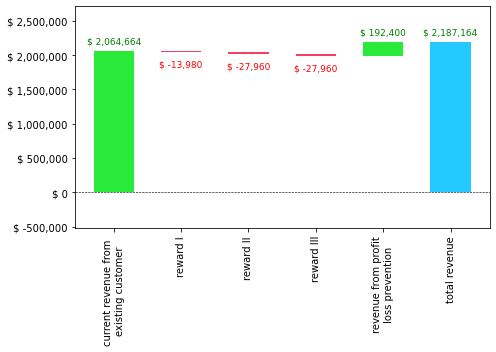

In [160]:
import waterfall_chart
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)
a = ['current revenue from \nexisting customer', 'reward I', 'reward II', 'reward III', 'revenue from profit\nloss prevention']
b = [2064663.509, -13980, -27960, -27960, 192400]
wtr = waterfall_chart.plot(a, b, rotation_value=90, formatting='$ {:,.0f}', net_label='total revenue')
plt.tight_layout()
wtr.savefig('Waterfallchart.png')

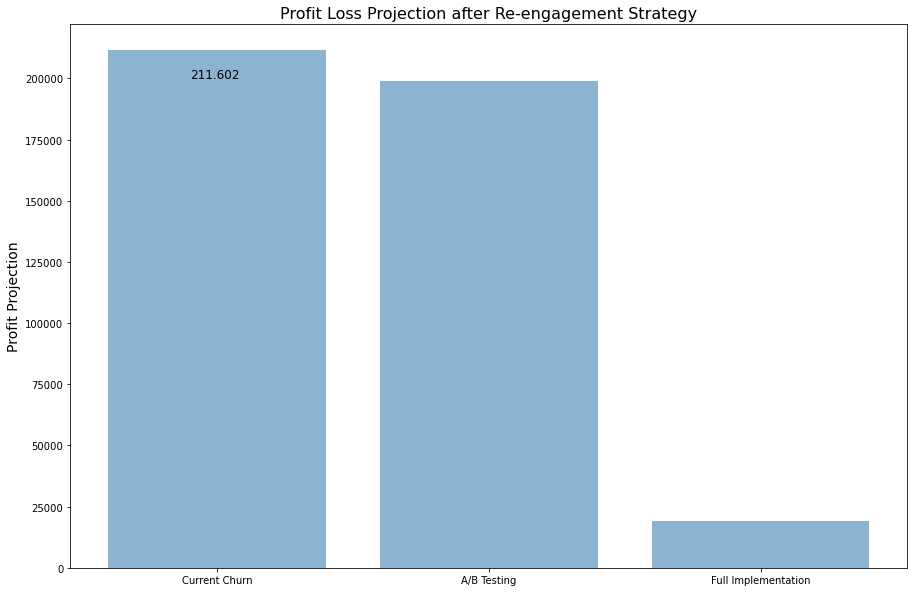

In [161]:
plt.figure(figsize=(15,10))
plt.title('Profit Loss Projection after Re-engagement Strategy', fontsize = 16)
X = ['Current Churn', 'A/B Testing', 'Full Implementation']
y= [211602,198825,19128]
plt.bar(X, y)

plt.ylabel('Profit Projection', fontsize = 14)
plt.text(-0.1, 200000, "211.602", fontsize=12)

plt.savefig('profit loss.png')

In [162]:
df2_pre.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [163]:
cc = df1_pre[['Attrition_Flag','Card_Category', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']]


In [164]:
cc = df1_pre.groupby(['Card_Category','Attrition_Flag']).agg({'Total_Trans_Amt': ['mean','median'],
                                                              'Total_Trans_Ct': ['mean','median'],
                                                              'Avg_Utilization_Ratio': ['mean','median']}).reset_index()
cc

Card_Category     Attrition_Flag Total_Trans_Amt        Total_Trans_Ct  \
                                              mean median           mean   
0          Blue  Attrited Customer     2954.164582   2314      44.226465   
1          Blue  Existing Customer     4469.314387   4086      67.827460   
2          Gold  Attrited Customer     5841.809524   6782      59.857143   
3          Gold  Existing Customer     8093.189474   7690      86.305263   
4      Platinum  Attrited Customer     4755.800000   4758      60.200000   
5      Platinum  Existing Customer    10414.400000   8888      95.866667   
6        Silver  Attrited Customer     4899.682927   4753      53.280488   
7        Silver  Existing Customer     6883.602537   4258      78.414376   

         Avg_Utilization_Ratio         
  median                  mean median  
0   43.0              0.171740  0.000  
1   70.0              0.313714  0.244  
2   64.0              0.036286  0.032  
3   88.0              0.061705  0.053  
4   65.0              0.010400  0.012  
5  102.0              0.054733  0.050  
6   50.5              0.032439  0.005  
7   77.0              0.061622  0.053

In [165]:
cc2 = df1_pre.groupby(['Card_Category']).agg({'Total_Trans_Amt': ['mean','median'],
                                                              'Total_Trans_Ct': ['mean','median'],
                                                              'Avg_Utilization_Ratio': ['mean','median']}).reset_index()
cc2

Card_Category Total_Trans_Amt         Total_Trans_Ct         \
                           mean  median           mean median   
0          Blue     4225.406740  3856.5      64.028190     67   
1          Gold     7685.612069  7652.5      81.517241     82   
2      Platinum     8999.750000  8427.0      86.950000     94   
3        Silver     6590.482883  4303.0      74.700901     73   

  Avg_Utilization_Ratio          
                   mean  median  
0              0.290859  0.2070  
1              0.057103  0.0505  
2              0.043650  0.0445  
3              0.057310  0.0490

In [166]:
cc3 = df1_pre[df1_pre['Card_Category']!='Blue']
cc3.describe()

Customer_Age  Dependent_count  Months_on_book  \
count    691.000000       691.000000      691.000000   
mean      45.691751         2.479016       35.487699   
std        7.223487         1.341882        7.320276   
min       26.000000         0.000000       13.000000   
25%       41.000000         2.000000       32.000000   
50%       46.000000         3.000000       36.000000   
75%       50.000000         3.000000       39.000000   
max       65.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                691.000000              691.000000   
mean                   3.319826                2.279305   
std                    1.653419                0.947226   
min                    1.000000                0.000000   
25%                    2.000000                2.000000   
50%                    3.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count             691.000000    691.000000           691.000000   
mean                2.451520  25949.590449          1231.117221   
std                 1.057154   9534.844326           796.807323   
min                 0.000000   3735.000000             0.000000   
25%                 2.000000  15933.500000           670.500000   
50%                 2.000000  31718.000000          1391.000000   
75%                 3.000000  34516.000000          1847.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count       691.000000            691.000000       691.000000      691.000000   
mean      24718.473227              0.764566      6844.057887       76.199711   
std        9514.052601              0.202366      4825.180040       27.202313   
min        2261.000000              0.000000       691.000000       13.000000   
25%       14613.000000              0.658500      3145.500000       58.000000   
50%       30388.000000              0.748000      4660.000000       74.000000   
75%       33014.000000              0.855500      9082.000000       98.000000   
max       34516.000000              2.368000     17628.000000      134.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count           691.000000             691.000000  
mean              0.707443               0.056880  
std               0.213247               0.052119  
min               0.000000               0.000000  
25%               0.597000               0.023000  
50%               0.706000               0.049000  
75%               0.791000               0.073000  
max               2.429000               0.395000

In [167]:
cc.columns

MultiIndex([(        'Card_Category',       ''),
            (       'Attrition_Flag',       ''),
            (      'Total_Trans_Amt',   'mean'),
            (      'Total_Trans_Amt', 'median'),
            (       'Total_Trans_Ct',   'mean'),
            (       'Total_Trans_Ct', 'median'),
            ('Avg_Utilization_Ratio',   'mean'),
            ('Avg_Utilization_Ratio', 'median')],
           )

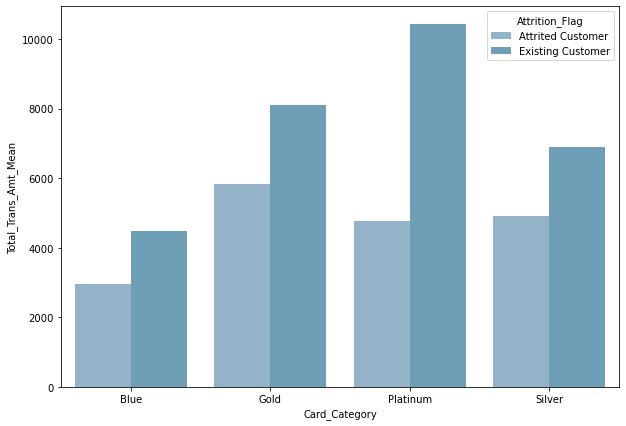

In [168]:
bp1 = plt.figure(figsize=(10,7))
sns.barplot(('Card_Category', ''),('Total_Trans_Amt', 'mean'), hue='Attrition_Flag', data=cc)
plt.xlabel('Card_Category')
plt.ylabel('Total_Trans_Amt_Mean')
bp1.savefig('Barplot1.png')

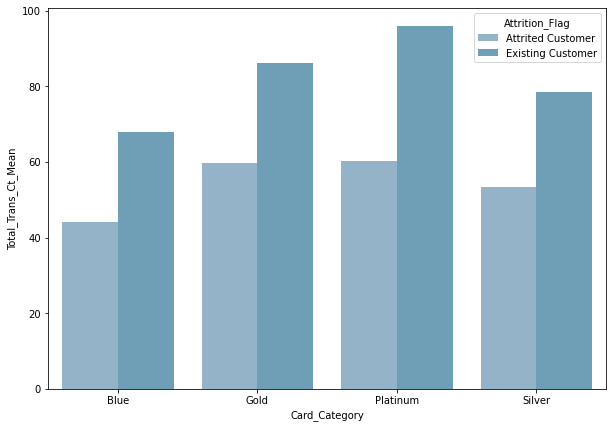

In [169]:
bp2 = plt.figure(figsize=(10,7))
sns.barplot(('Card_Category', ''),('Total_Trans_Ct', 'mean'), hue='Attrition_Flag', data=cc)
plt.xlabel('Card_Category')
plt.ylabel('Total_Trans_Ct_Mean')
bp2.savefig('Barplot2.png')

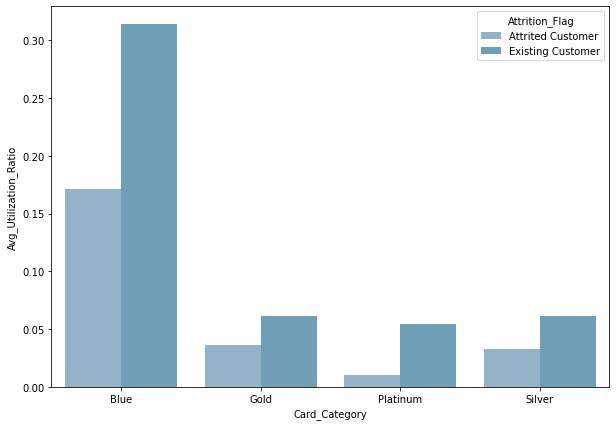

In [170]:
bp3 = plt.figure(figsize=(10,7))
sns.barplot(('Card_Category', ''),('Avg_Utilization_Ratio', 'mean'), hue='Attrition_Flag', data=cc)
plt.xlabel('Card_Category')
plt.ylabel('Avg_Utilization_Ratio')
bp1.savefig('Barplot3.png')

In [171]:
df1_pre.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

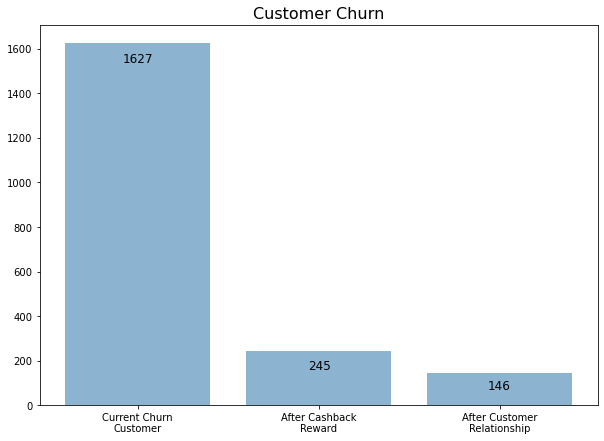

In [173]:


plt.figure(figsize=(10,7))
plt.title('Customer Churn', fontsize = 16)
xx = ['Current Churn\nCustomer', 'After Cashback\nReward', 'After Customer\nRelationship']
yy = [1627, 245, 146]
plt.bar(xx, yy)

#plt.ylabel('Profit Projection', fontsize = 14)
plt.text(-0.08, 1540, "1627", fontsize=12)
plt.text(0.94, 160, "245", fontsize=12)
plt.text(1.93, 70, "146", fontsize=12)


plt.savefig('customer churn.png')